# Presenting the data set

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D, axes3d
import matplotlib.pyplot as plt

# reading the xls file
SC_D = pd.read_csv(r'C:\Users\Abdulrahman Eid\Desktop\AE597_ML\DaylightData_StateCollege_AE597.csv')

X = SC_D.iloc[:,0:8].values.astype(float)
y = SC_D.iloc[:, 8].values.astype(float)
# splitting the data set

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=60)

print(X_train.shape)
print(y_train.shape)
X

(2463, 8)
(2463,)


array([[1.01085000e+04, 1.04000000e+02, 6.90000000e+01, ...,
        2.60000000e+01, 1.30551749e+02, 9.51516716e+01],
       [1.01095000e+04, 4.50000000e+01, 1.17000000e+02, ...,
        4.20000000e+01, 1.45145754e+02, 9.35721542e+01],
       [1.01105000e+04, 3.70000000e+01, 1.62000000e+02, ...,
        5.90000000e+01, 1.60177362e+02, 9.13608300e+01],
       ...,
       [1.23114500e+05, 6.00000000e+00, 1.18000000e+02, ...,
        1.68000000e+02, 2.35612837e+02, 5.36538971e+01],
       [1.23115500e+05, 0.00000000e+00, 6.20000000e+01, ...,
        8.20000000e+01, 1.67651545e+02, 7.39188752e+01],
       [1.23116500e+05, 0.00000000e+00, 1.00000000e+01, ...,
        1.30000000e+01, 1.13082512e+02, 9.01308577e+01]])

In [67]:

SC_D.head(10)

Encoded_data  Direct_irradiance   Diffused_irradiance  Sd/Ed_ratio  \
0       10108.5                 104                   69     2.363636   
1       10109.5                  45                  117     2.625000   
2       10110.5                  37                  162     2.565217   
3       10111.5                 345                  199     2.508197   
4       10112.5                 539                  150     2.353659   
5       10113.5                 498                  148     2.405797   
6       10114.5                 496                  109     2.301887   
7       10115.5                 340                   88     2.535714   
8       10116.5                  51                   18     1.000000   
9       10208.5                 149                   84     2.461538   

   3rd_sensor  Final_2_sensor daylight signal  Final_2_sensor signal  \
0          34                              26             130.551749   
1          53                              42             145.145754   
2          74                              59             160.177362   
3         189                             153             243.491802   
4         238                             193             277.586624   
5         201                             166             248.043804   
6         155                             122             208.854126   
7          81                              71             165.370254   
8          28                              40             130.762513   
9          42                              32             135.989351   

   Dimming_level  Shades  
0      95.151672       3  
1      93.572154       3  
2      91.360830       3  
3      79.356498       3  
4      72.722526       3  
5      69.865880       3  
6      75.269874       3  
7      83.713615       3  
8      79.660619       1  
9      94.519865       3

# Rescaling approach

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)

# applying the StandarScaler with setting the parameter with_mean = False using method chaining

X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_train).transform(X_test)

# print dataset properties before and after scaling

print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

# transform test data

X_test_scaled = scaler.transform(X_test)

# print test data properties after scaling in order to check the positivity of the values

print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

transformed shape: (2463, 8)
per-feature minimum before scaling:
 [1.01085000e+04 0.00000000e+00 2.00000000e+00 8.00000000e-01
 3.00000000e+00 3.00000000e+00 1.05187028e+02 1.00000000e+00]
per-feature maximum before scaling:
 [1.23116500e+05 1.00300000e+03 5.89000000e+02 3.75541796e+00
 1.91500000e+03 1.71100000e+03 1.73207577e+03 9.64152854e+01]
per-feature minimum after scaling:
 [0.29447826 0.         0.01979278 1.41277929 0.00748612 0.00867516
 0.32808184 0.03220292]
per-feature maximum after scaling:
 [3.58659871 3.06306008 5.82897379 6.63197089 4.7786421  4.9477346
 5.40240204 3.10485327]
per-feature minimum after scaling:
[0.29459479 0.         0.02968917 1.47164509 0.0099815  0.01156688
 0.33026316 0.03220292]
per-feature maximum after scaling:
[3.58636565 3.04779059 5.73000989 6.52858554 4.46921566 4.59494464
 5.02187998 3.09468025]


In [4]:
from sklearn.preprocessing import MinMaxScaler

scalerM = MinMaxScaler()

# applying the StandarScaler with setting the parameter with_mean = False using method chaining

X_train_scaledM = scalerM.fit(X_train).transform(X_train)
X_test_scaledM = scalerM.fit(X_train).transform(X_test)

# print dataset properties before and after scaling

print("transformed shape: {}".format(X_train_scaledM.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaledM.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaledM.max(axis=0)))

# transform test data

X_test_scaledM = scalerM.transform(X_test)

# print test data properties after scaling in order to check the positivity of the values

print("per-feature minimum after scaling:\n{}".format(X_test_scaledM.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaledM.max(axis=0)))

transformed shape: (2463, 8)
per-feature minimum before scaling:
 [1.01085000e+04 0.00000000e+00 2.00000000e+00 8.00000000e-01
 3.00000000e+00 3.00000000e+00 1.05187028e+02 1.00000000e+00]
per-feature maximum before scaling:
 [1.23116500e+05 1.00300000e+03 5.89000000e+02 3.75541796e+00
 1.91500000e+03 1.71100000e+03 1.73207577e+03 9.64152854e+01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1.]
per-feature minimum after scaling:
[3.53957242e-05 0.00000000e+00 1.70357751e-03 1.12787205e-02
 5.23012552e-04 5.85480094e-04 4.29872604e-04 0.00000000e+00]
per-feature maximum after scaling:
[0.99992921 0.99501496 0.98296422 0.98019131 0.93514644 0.92857143
 0.92501024 0.99668917]


In [5]:
from sklearn.svm import SVC

# applying without scaling data set
svm = SVC(C=1)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.73


In [6]:
# applying with Standard scaled data set
svm = SVC(C=1)
svm.fit(X_train_scaled, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Test set accuracy: 0.98


In [7]:

# applying with MinMax scaled data set
svm = SVC(C=1)
svm.fit(X_train_scaledM, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test_scaledM, y_test)))

Test set accuracy: 0.99


# Classification

# MLP

In [8]:
import mglearn

In [9]:
from sklearn.neural_network import MLPClassifier
i=0

alph = [0.000001, 0.0001, 0.01, 0.1, 1]
n_layers = [1, 2, 5, 10, 100, 1000]
while i<=4:
    j=0
    while j<=5:
        MLPC = MLPClassifier(solver='adam', random_state=0, alpha=alph[i], max_iter=650, epsilon=1e-08, hidden_layer_sizes=[n_layers[j]])
        mlp = MLPC.fit(X_train_scaledM, y_train)
        
        print("Alpha")
        print(alph[i])
        print("Layer")
        print(n_layers[j])
        print("Accuracy on training set: {:.2f}".format(MLPC.score(X_train_scaledM, y_train)))
        print("Accuracy on test set: {:.2f}".format(MLPC.score(X_test_scaledM, y_test)))
        j=j+1
        
    i=i+1





C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (650) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha
1e-06
Layer
1
Accuracy on training set: 0.91
Accuracy on test set: 0.91


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (650) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha
1e-06
Layer
2
Accuracy on training set: 0.91
Accuracy on test set: 0.90
Alpha
1e-06
Layer
5
Accuracy on training set: 0.99
Accuracy on test set: 0.99


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (650) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha
1e-06
Layer
10
Accuracy on training set: 0.99
Accuracy on test set: 0.98
Alpha
1e-06
Layer
100
Accuracy on training set: 1.00
Accuracy on test set: 0.99
Alpha
1e-06
Layer
1000
Accuracy on training set: 1.00
Accuracy on test set: 1.00


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (650) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha
0.0001
Layer
1
Accuracy on training set: 0.91
Accuracy on test set: 0.91


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (650) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha
0.0001
Layer
2
Accuracy on training set: 0.91
Accuracy on test set: 0.90
Alpha
0.0001
Layer
5
Accuracy on training set: 0.99
Accuracy on test set: 0.99


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (650) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha
0.0001
Layer
10
Accuracy on training set: 0.99
Accuracy on test set: 0.98
Alpha
0.0001
Layer
100
Accuracy on training set: 1.00
Accuracy on test set: 0.99
Alpha
0.0001
Layer
1000
Accuracy on training set: 1.00
Accuracy on test set: 1.00


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (650) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha
0.01
Layer
1
Accuracy on training set: 0.91
Accuracy on test set: 0.91


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (650) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha
0.01
Layer
2
Accuracy on training set: 0.91
Accuracy on test set: 0.90
Alpha
0.01
Layer
5
Accuracy on training set: 0.99
Accuracy on test set: 0.98


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (650) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha
0.01
Layer
10
Accuracy on training set: 0.99
Accuracy on test set: 0.98
Alpha
0.01
Layer
100
Accuracy on training set: 1.00
Accuracy on test set: 0.99
Alpha
0.01
Layer
1000
Accuracy on training set: 0.99
Accuracy on test set: 0.99


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (650) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha
0.1
Layer
1
Accuracy on training set: 0.90
Accuracy on test set: 0.90


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (650) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha
0.1
Layer
2
Accuracy on training set: 0.91
Accuracy on test set: 0.90
Alpha
0.1
Layer
5
Accuracy on training set: 0.99
Accuracy on test set: 0.98
Alpha
0.1
Layer
10
Accuracy on training set: 0.99
Accuracy on test set: 0.98
Alpha
0.1
Layer
100
Accuracy on training set: 0.99
Accuracy on test set: 0.98
Alpha
0.1
Layer
1000
Accuracy on training set: 0.99
Accuracy on test set: 0.98


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (650) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha
1
Layer
1
Accuracy on training set: 0.88
Accuracy on test set: 0.88
Alpha
1
Layer
2
Accuracy on training set: 0.88
Accuracy on test set: 0.88
Alpha
1
Layer
5
Accuracy on training set: 0.96
Accuracy on test set: 0.95
Alpha
1
Layer
10
Accuracy on training set: 0.96
Accuracy on test set: 0.95
Alpha
1
Layer
100
Accuracy on training set: 0.96
Accuracy on test set: 0.95
Alpha
1
Layer
1000
Accuracy on training set: 0.97
Accuracy on test set: 0.96


Populating the interactive namespace from numpy and matplotlib


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


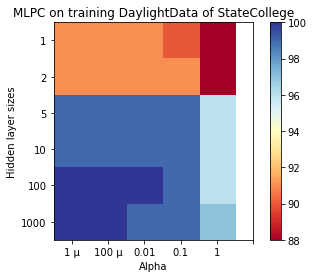

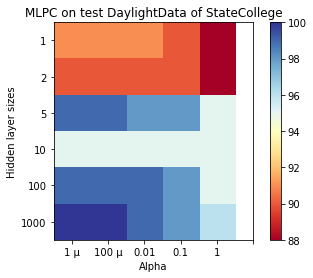

In [189]:
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Alp = ['1 µ', '100 µ', '0.01', '0.1', '1'] 
Lay = ['1', '2', '5', '10', '100', '1000'] 

# training set
df = pd.DataFrame([[91, 91, 91, 90, 88], [91, 91, 91, 91, 88], [99, 99, 99, 99, 96], [99, 99, 99, 99, 96],
                  [100, 100, 100, 99, 96], [100, 100, 99, 99, 97]], 
                   columns = Alp, index = Lay)
plt.imshow(df, cmap ="RdYlBu")
plt.colorbar()
plt.xticks(range(len(df)), df.columns)
plt.yticks(range(len(df)), df.index)
plt.xlabel('Alpha')
plt.ylabel('Hidden layer sizes')
plt.title('MLPC on training DaylightData of StateCollege')
plt.show()

# test set
df1 = pd.DataFrame([[91, 91, 91, 90, 88], [90, 90, 90, 90, 88], [99, 99, 98, 98, 95], [95, 95, 95, 95, 95],
                  [99, 99, 99, 98, 95], [100, 100, 99, 98, 96]], 
                   columns = Alp, index = Lay)
plt.imshow(df1, cmap ="RdYlBu")
plt.colorbar()
plt.xticks(range(len(df1)), df1.columns)
plt.yticks(range(len(df1)), df1.index)
plt.xlabel('Alpha')
plt.ylabel('Hidden layer sizes')
plt.title('MLPC on test DaylightData of StateCollege')
plt.show()

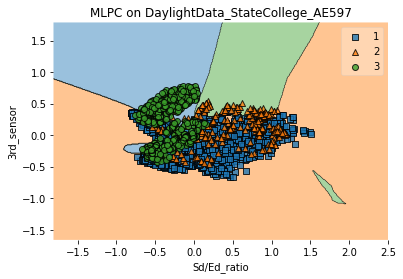

In [171]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

pca = PCA(n_components=2)
pca.fit_transform(X_train_scaledM)
X_new = pca.transform(X_train_scaledM)
X_newt = pca.transform(X_test_scaledM)

MLPC = MLPClassifier(solver='adam', random_state=0, alpha=0.0001, max_iter=1000, epsilon=1e-08, hidden_layer_sizes=[100, 100])
mlp = MLPC.fit(X_new, y_train)
        
#value=0.25
#width=0.75

plot_decision_regions(X_new, y_train.astype(np.integer), clf=MLPC, feature_index=[0,1])                         
              #filler_feature_values={0: value, 1:value, 2:value, 5:value, 6:value, 7:value},  
             # filler_feature_ranges={0: width, 1: width, 2: width, 5: width, 6: width, 7: width})
    # Adding axes annotations
plt.xlabel('Sd/Ed_ratio')
plt.ylabel('3rd_sensor')
plt.title('MLPC on DaylightData_StateCollege_AE597')
plt.show()

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

    
MLPC = MLPClassifier(solver='adam', random_state=0, alpha=0.3, max_iter=650, hidden_layer_sizes=5)
mlp = MLPC.fit(X_train_scaledM, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train_scaledM, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train_scaledM[:, 0], X_train_scaledM[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")    

mglearn.plots.plot_2d_separator(mlp, X_train_scaledM, fill=True, alpha=.4)
mglearn.discrete_scatter(X_train_scaledM[:, 3], X_train_scaledM[:, 4], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [127]:
!pip install mlxtend


In [177]:
X_train_scaledM.max()

1.0

Alpha
1e-06
Layer
1


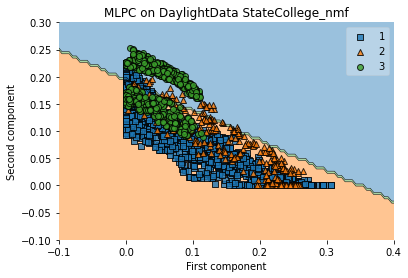

Alpha
1e-06
Layer
2


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


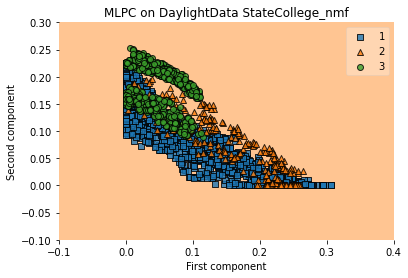

Alpha
1e-06
Layer
5


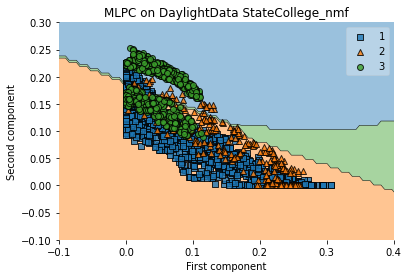

Alpha
1e-06
Layer
10


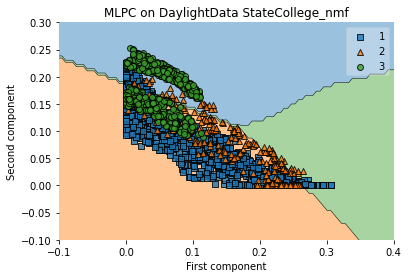

Alpha
1e-06
Layer
100


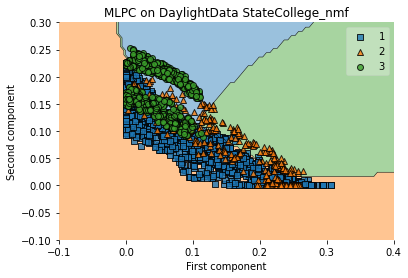

Alpha
1e-06
Layer
1000


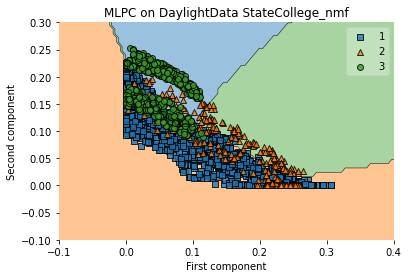

Alpha
0.0001
Layer
1


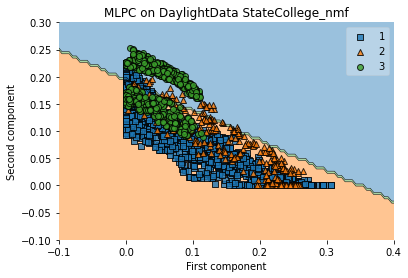

Alpha
0.0001
Layer
2


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


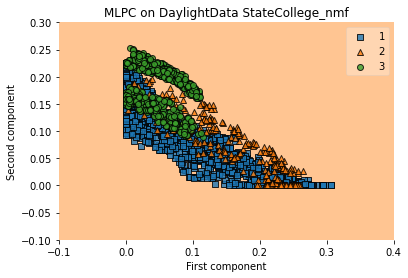

Alpha
0.0001
Layer
5


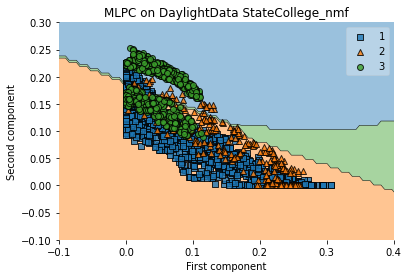

Alpha
0.0001
Layer
10


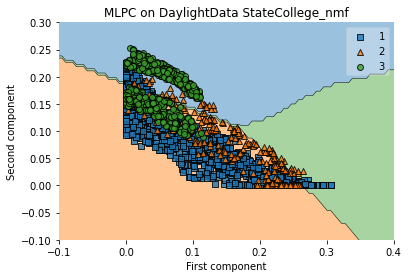

Alpha
0.0001
Layer
100


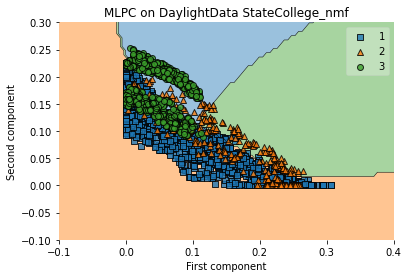

Alpha
0.0001
Layer
1000


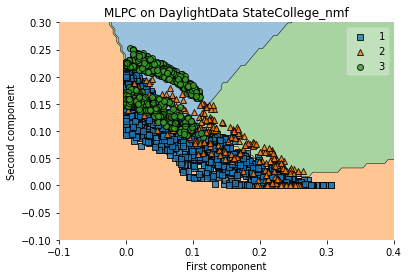

Alpha
0.01
Layer
1


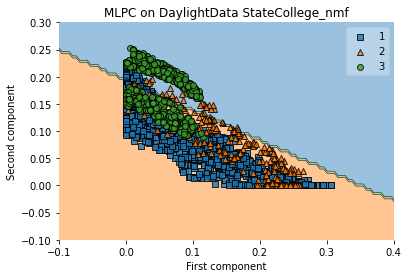

Alpha
0.01
Layer
2


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


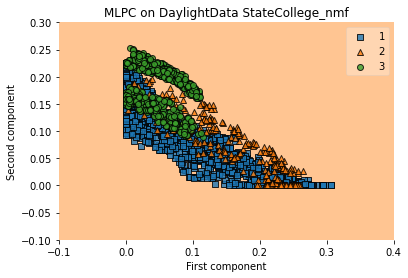

Alpha
0.01
Layer
5


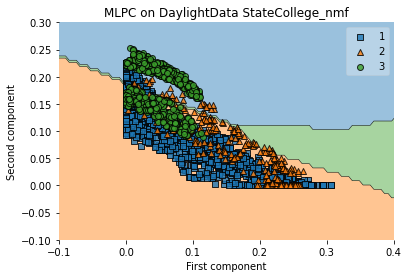

Alpha
0.01
Layer
10


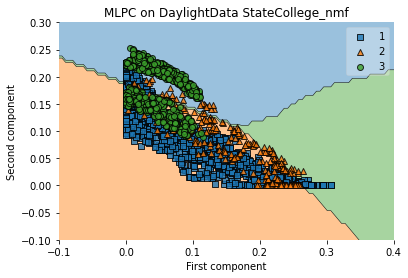

Alpha
0.01
Layer
100


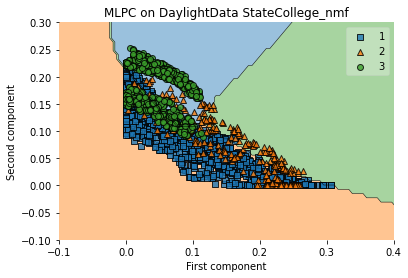

Alpha
0.01
Layer
1000


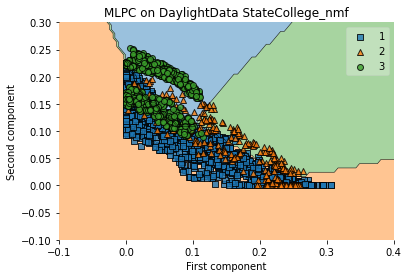

Alpha
0.1
Layer
1


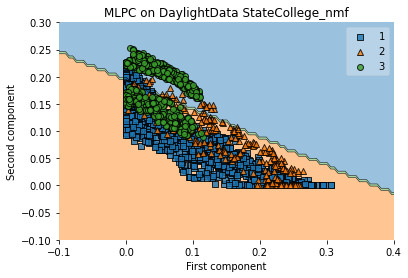

Alpha
0.1
Layer
2


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


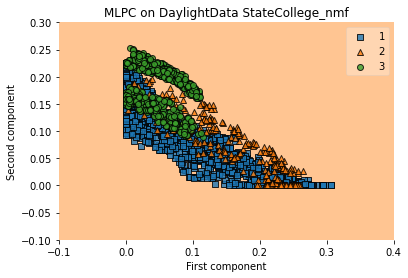

Alpha
0.1
Layer
5


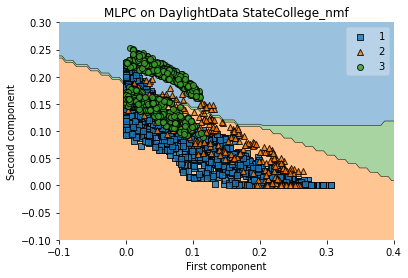

Alpha
0.1
Layer
10


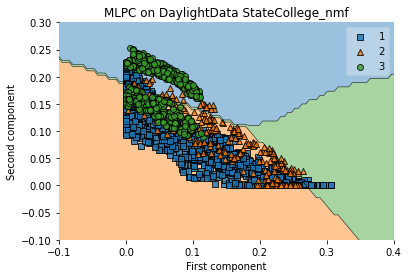

Alpha
0.1
Layer
100


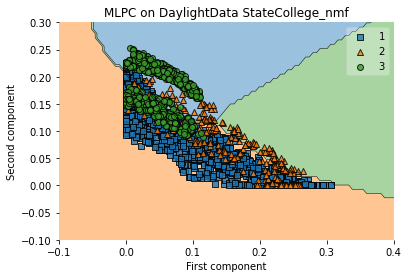

Alpha
0.1
Layer
1000


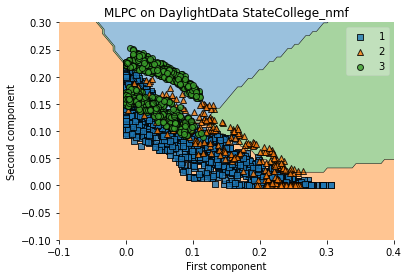

Alpha
1
Layer
1


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


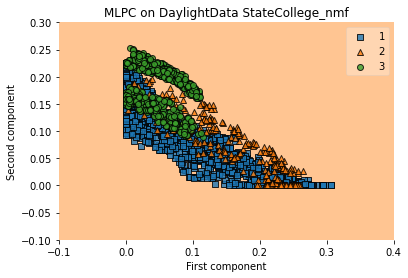

Alpha
1
Layer
2


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


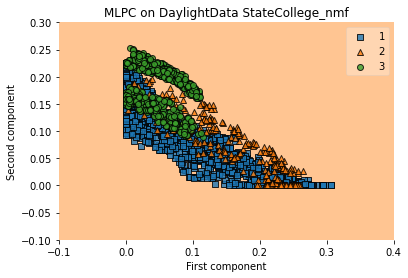

Alpha
1
Layer
5


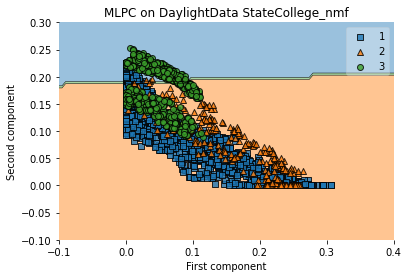

Alpha
1
Layer
10


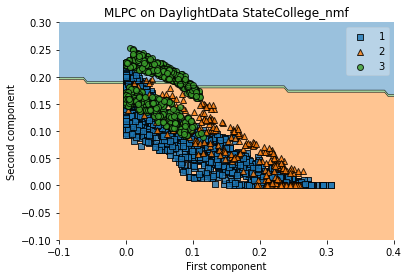

Alpha
1
Layer
100


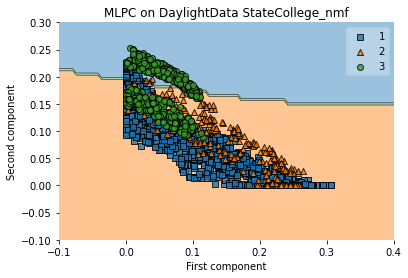

Alpha
1
Layer
1000


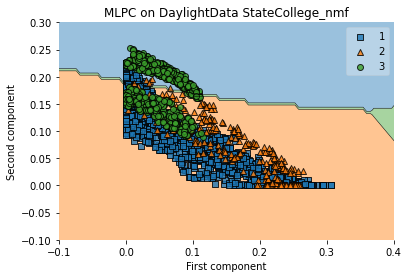

In [197]:
from sklearn.neural_network import MLPClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import NMF
import mglearn
from matplotlib import pyplot as plt

i=0
alph = [0.000001, 0.0001, 0.01, 0.1, 1]
n_layers = [1, 2, 5, 10, 100, 1000]
nmf = NMF(n_components=2, random_state=42,max_iter=500)
NMF_R = nmf.fit_transform(X_train_scaledM)
NMF_Rt = nmf.fit_transform(X_test_scaledM)
#alph = [0.000001, 0.0001]
#n_layers = [100, 1000]
while i<=4:
    j=0
    while j<=5:
        
        MLPC = MLPClassifier(solver='adam', random_state=0, alpha=alph[i], max_iter=1000, epsilon=1e-08, hidden_layer_sizes=[n_layers[j]])
        mlp = MLPC.fit(NMF_R, y_train)
        
# applying the NMF to the scaled x-train set with two componenets

        print("Alpha")
        print(alph[i])
        print("Layer")
        print(n_layers[j])
        
    #MLPC = MLPClassifier(solver='adam', random_state=0, alpha=0.0001, max_iter=650, epsilon=1e-08, hidden_layer_sizes=[100, 100])
    #mlp = MLPC.fit(X_train_scaledM, y_train)
        
        value=0.25
        width=0.75
        

        plot_decision_regions(NMF_R, y_train.astype(np.integer), clf=MLPC, feature_index=[0,1])
        #Adding axes annotations
        plt.xlabel('First component')
        plt.ylabel('Second component')
        plt.title('MLPC on DaylightData StateCollege_nmf')
        plt.xlim(-0.1, 0.4)
        plt.ylim(-0.1, 0.3)
        plt.show()
        
         
        #pca = PCA(n_components=2)
       # pca.fit_transform(X_train_scaledM)
       # X_new = pca.transform(X_train_scaledM)
        #X_newt = pca.transform(X_test_scaledM)

       # MLPC = MLPClassifier(solver='adam', random_state=0, alpha=alph[i], max_iter=1000, epsilon=1e-08, hidden_layer_sizes=[n_layers[j]])
        #mlp = MLPC.fit(X_new, y_train)
        #print("Alpha")
        #print(alph[i])
        #print("Layer")
        #print(n_layers[j])
        
        #value=0.25
        #width=0.75

        #plot_decision_regions(X_new, y_train.astype(np.integer), clf=MLPC, feature_index=[0,1])                         
              #filler_feature_values={0: value, 1:value, 2:value, 5:value, 6:value, 7:value},  
             # filler_feature_ranges={0: width, 1: width, 2: width, 5: width, 6: width, 7: width})
        # Adding axes annotations
        #plt.xlabel('Sd/Ed_ratio')
        #plt.ylabel('3rd_sensor')
        #plt.title('MLPC on DaylightData_StateCollege_AE597')
        #plt.show()  
        j=j+1
    i=i+1

Alpha
1e-06
Layer
1


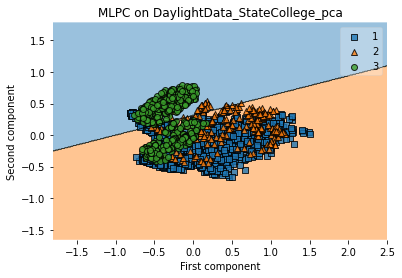

Alpha
1e-06
Layer
2


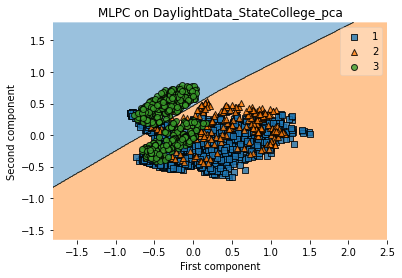

Alpha
1e-06
Layer
5


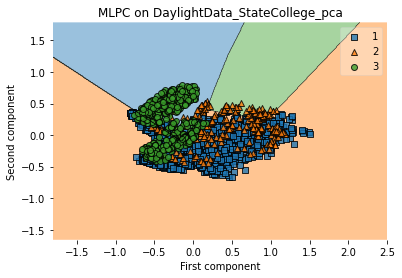

Alpha
1e-06
Layer
10


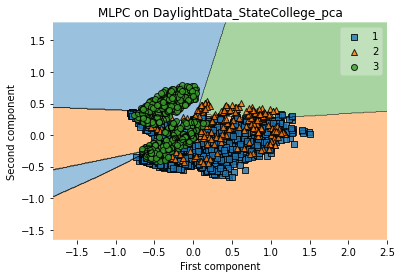

Alpha
1e-06
Layer
100


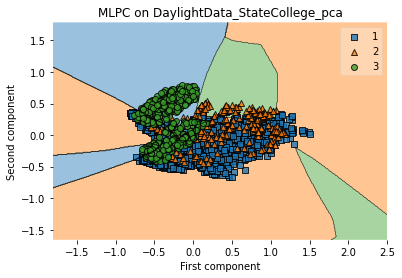

Alpha
1e-06
Layer
1000


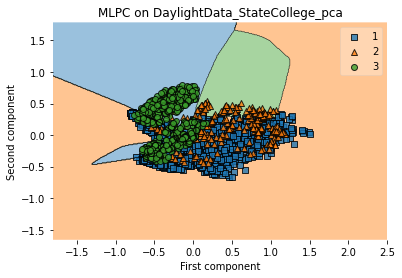

Alpha
0.0001
Layer
1


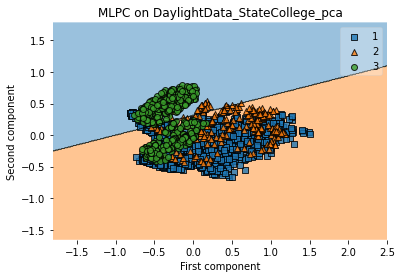

Alpha
0.0001
Layer
2


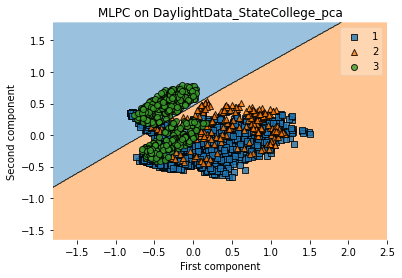

Alpha
0.0001
Layer
5


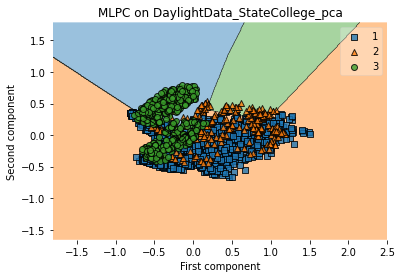

Alpha
0.0001
Layer
10


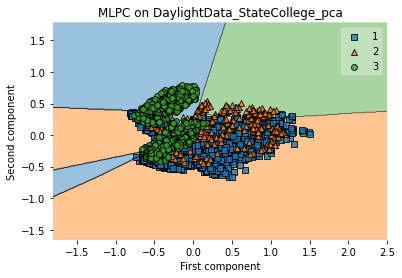

Alpha
0.0001
Layer
100


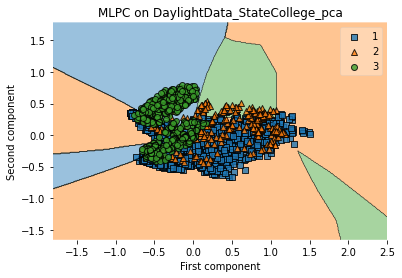

Alpha
0.0001
Layer
1000


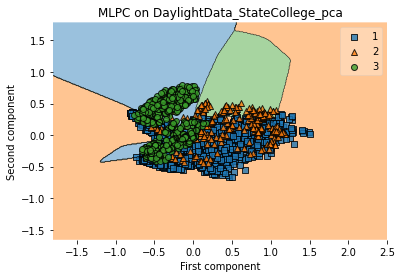

Alpha
0.01
Layer
1


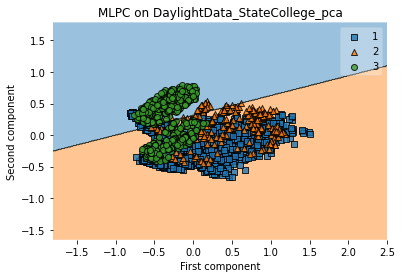

Alpha
0.01
Layer
2


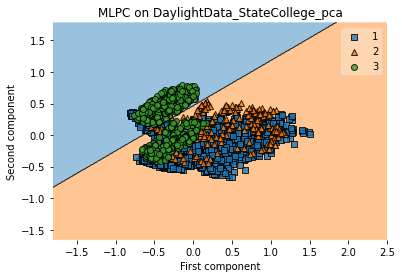

Alpha
0.01
Layer
5


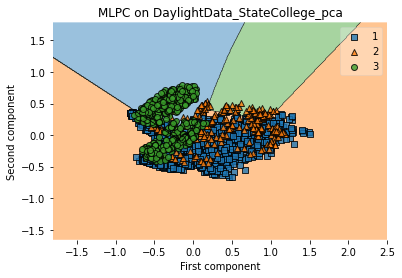

Alpha
0.01
Layer
10


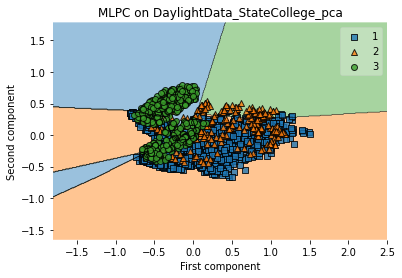

Alpha
0.01
Layer
100


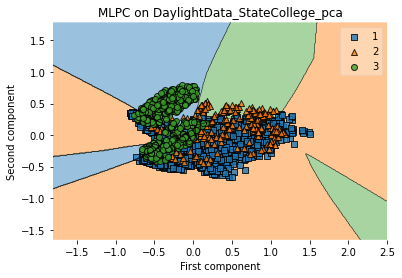

Alpha
0.01
Layer
1000


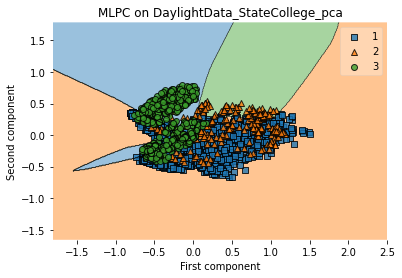

Alpha
0.1
Layer
1


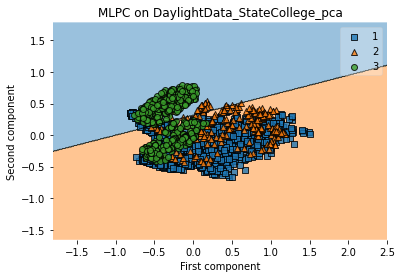

Alpha
0.1
Layer
2


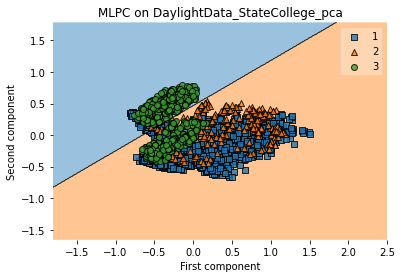

Alpha
0.1
Layer
5


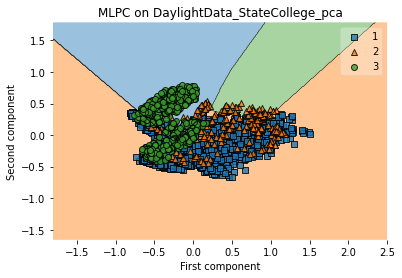

Alpha
0.1
Layer
10


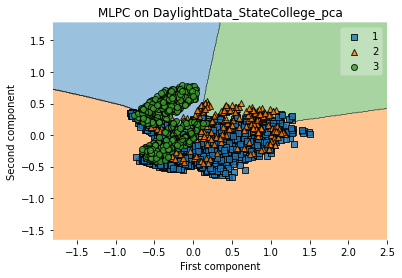

Alpha
0.1
Layer
100


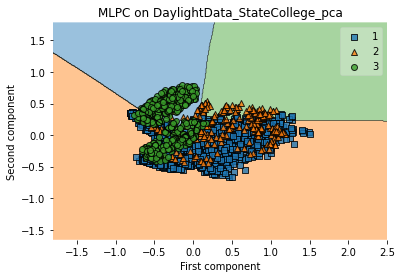

Alpha
0.1
Layer
1000


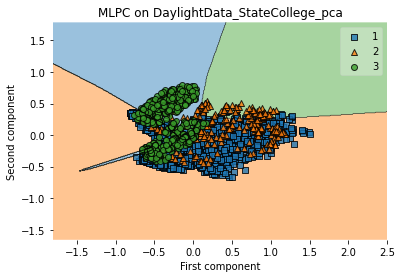

Alpha
1
Layer
1


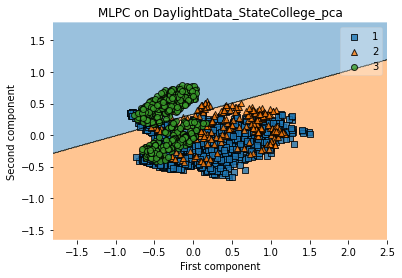

Alpha
1
Layer
2


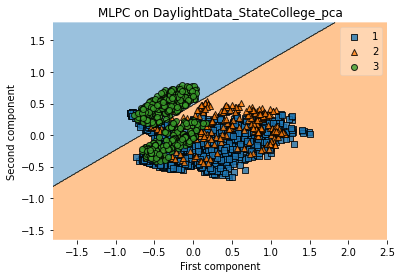

Alpha
1
Layer
5


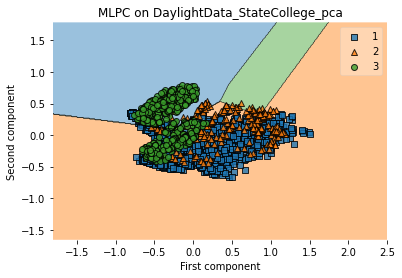

Alpha
1
Layer
10


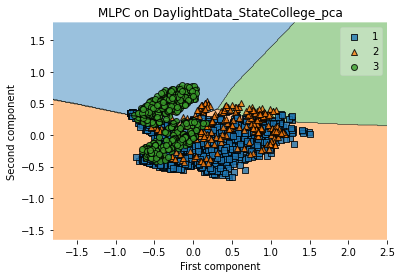

Alpha
1
Layer
100


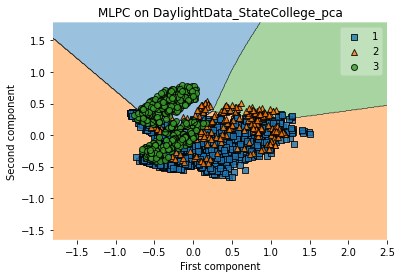

Alpha
1
Layer
1000


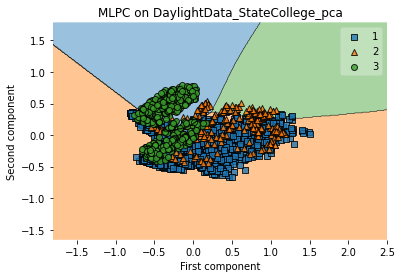

In [198]:
from sklearn.neural_network import MLPClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

i=0
alph = [0.000001, 0.0001, 0.01, 0.1, 1]
n_layers = [1, 2, 5, 10, 100, 1000]
while i<=4:
    j=0
    while j<=5:
        #MLPC = MLPClassifier(solver='adam', random_state=0, alpha=alph[i], max_iter=1000, epsilon=1e-08, hidden_layer_sizes=[n_layers[j]])
        #mlp = MLPC.fit(X_train_scaledM, y_train)
        #print("Alpha")
        #print(alph[i])
        #print("Layer")
        #print(n_layers[j])
        
    #MLPC = MLPClassifier(solver='adam', random_state=0, alpha=0.0001, max_iter=650, epsilon=1e-08, hidden_layer_sizes=[100, 100])
    #mlp = MLPC.fit(X_train_scaledM, y_train)
        
        #value=0.25
        #width=0.75

        #plot_decision_regions(X_train_scaledM, y_train.astype(np.integer), clf=MLPC, feature_index=[3,4],                         
             # filler_feature_values={0: value, 1:value, 2:value, 5:value, 6:value, 7:value},  
             # filler_feature_ranges={0: width, 1: width, 2: width, 5: width, 6: width, 7: width})
    # Adding axes annotations
       # plt.xlabel('Sd/Ed_ratio')
        #plt.ylabel('3rd_sensor')
       # plt.title('MLPC on DaylightData_StateCollege_AE597')
        #plt.show()
        
         
        pca = PCA(n_components=2)
        pca.fit_transform(X_train_scaledM)
        X_new = pca.transform(X_train_scaledM)
        X_newt = pca.transform(X_test_scaledM)

        MLPC = MLPClassifier(solver='adam', random_state=0, alpha=alph[i], max_iter=1000, epsilon=1e-08, hidden_layer_sizes=[n_layers[j]])
        mlp = MLPC.fit(X_new, y_train)
        print("Alpha")
        print(alph[i])
        print("Layer")
        print(n_layers[j])
        
        #value=0.25
        #width=0.75

        plot_decision_regions(X_new, y_train.astype(np.integer), clf=MLPC, feature_index=[0,1])                         
              #filler_feature_values={0: value, 1:value, 2:value, 5:value, 6:value, 7:value},  
             # filler_feature_ranges={0: width, 1: width, 2: width, 5: width, 6: width, 7: width})
        # Adding axes annotations
        plt.xlabel('First component')
        plt.ylabel('Second component')
        plt.title('MLPC on DaylightData_StateCollege_pca')
        plt.show()  
        j=j+1
    i=i+1

In [215]:
## Stratified K-Fold cross-validation on mlp
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

MLPC = MLPClassifier(solver='adam', random_state=0, alpha=0.0001, max_iter=1000, epsilon=1e-08, hidden_layer_sizes=1000)
mlp = MLPC.fit(X_train_scaledM, y_train)

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(MLPC, X_train_scaledM, y_train, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.99512987 0.99350649 0.99675325 0.99025974 0.99431818 0.99350649
 0.99269481 0.99350649 0.99675325 0.98782468]


# SVM

In [10]:
from sklearn.svm import SVC
i=0

c = [0.01, 0.1, 1, 5, 10]
g = [0.01, 0.1, 1, 5, 10]
while i<=4:
    j=0
    while j<=4:
        svc = SVC(kernel='rbf', C= c[i], gamma=g[j])
        svm = svc.fit(X_train_scaledM, y_train)

        
        print("C")
        print(c[i])
        print("gamma")
        print(g[j])
        print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaledM, y_train)))
        print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaledM, y_test)))
        j=j+1
        
    i=i+1



C
0.01
gamma
0.01
Accuracy on training set: 0.64
Accuracy on test set: 0.64
C
0.01
gamma
0.1
Accuracy on training set: 0.64
Accuracy on test set: 0.64
C
0.01
gamma
1
Accuracy on training set: 0.85
Accuracy on test set: 0.85
C
0.01
gamma
5
Accuracy on training set: 0.86
Accuracy on test set: 0.87
C
0.01
gamma
10
Accuracy on training set: 0.81
Accuracy on test set: 0.80
C
0.1
gamma
0.01
Accuracy on training set: 0.64
Accuracy on test set: 0.64
C
0.1
gamma
0.1
Accuracy on training set: 0.88
Accuracy on test set: 0.88
C
0.1
gamma
1
Accuracy on training set: 0.95
Accuracy on test set: 0.94
C
0.1
gamma
5
Accuracy on training set: 0.97
Accuracy on test set: 0.97
C
0.1
gamma
10
Accuracy on training set: 0.97
Accuracy on test set: 0.97
C
1
gamma
0.01
Accuracy on training set: 0.88
Accuracy on test set: 0.89
C
1
gamma
0.1
Accuracy on training set: 0.96
Accuracy on test set: 0.94
C
1
gamma
1
Accuracy on training set: 0.99
Accuracy on test set: 0.99
C
1
gamma
5
Accuracy on training set: 1.00
Accur

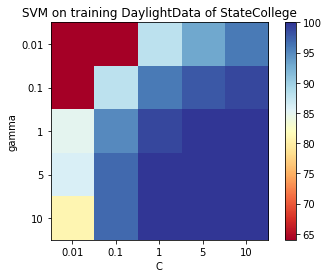

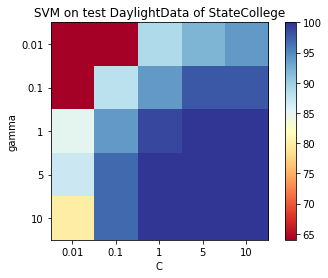

In [200]:
C_V = ['0.01', '0.1', '1', '5', '10'] 
Gam = ['0.01', '0.1', '1', '5', '10']

# training set
df2 = pd.DataFrame([[64, 64, 88, 93, 96], [64, 88, 96, 98, 99], [85, 95, 99, 100, 100], [86, 97, 100, 100, 100],
                  [81, 97, 100, 100, 100]], 
                   columns = C_V, index = Gam)
plt.imshow(df2, cmap ="RdYlBu")
plt.colorbar()
plt.xticks(range(len(df2)), df2.columns)
plt.yticks(range(len(df2)), df2.index)
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('SVM on training DaylightData of StateCollege')
plt.show()

# test set
df3 = pd.DataFrame([[64, 64, 89, 92, 94], [64, 88, 94, 98, 98], [85, 94, 99, 100, 100], [87, 97, 100, 100, 100],
                  [80, 97, 100, 100, 100]], 
                   columns = C_V, index = Gam)
plt.imshow(df3, cmap ="RdYlBu")
plt.colorbar()
plt.xticks(range(len(df3)), df3.columns)
plt.yticks(range(len(df3)), df3.index)
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('SVM on test DaylightData of StateCollege')
plt.show()

svc = SVC(kernel='rbf', C= 10, gamma=10)
#svc = SVC(C=1.0, kernel='rbf', degree=5, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=1000, decision_function_shape='ovr', break_ties=False, random_state=None)
svm = svc.fit(X_train_scaledM, y_train)

# Plotting decision regions

value=0.35
width=0.75

plot_decision_regions(X_train_scaledM, y_train.astype(np.integer), clf=svc, feature_index=[3,4],                         
              filler_feature_values={0: value, 1:value, 2:value, 5:value, 6:value, 7:value},  
              filler_feature_ranges={0: width, 1: width, 2: width, 5: width, 6: width, 7: width})

# Adding axes annotations
plt.xlabel('Sd/Ed_ratio')
plt.ylabel('3rd_sensor')
plt.title('SVM on State College data')
plt.show()

C
0.01
gamma
0.01


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


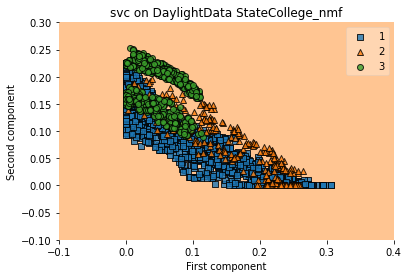

C
0.01
gamma
0.1


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


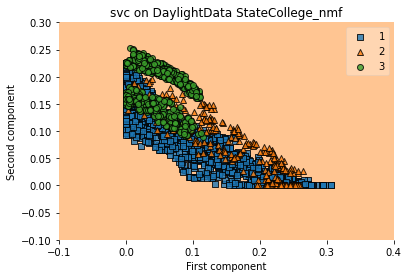

C
0.01
gamma
1


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


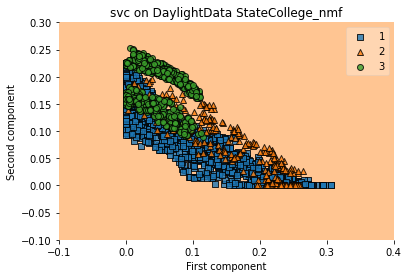

C
0.01
gamma
5


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


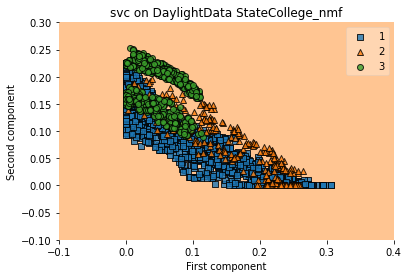

C
0.01
gamma
10


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


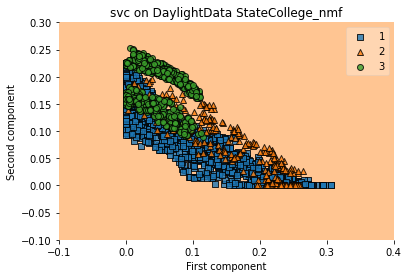

C
0.1
gamma
0.01


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


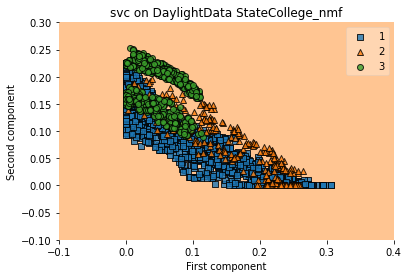

C
0.1
gamma
0.1


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


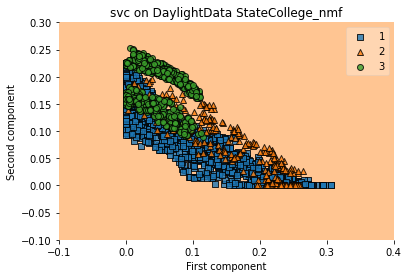

C
0.1
gamma
1


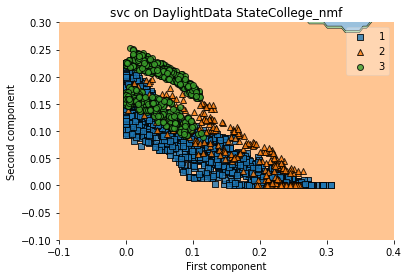

C
0.1
gamma
5


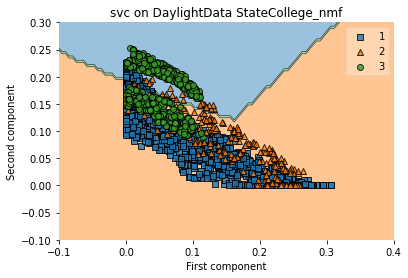

C
0.1
gamma
10


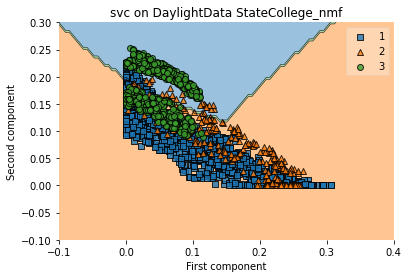

C
1
gamma
0.01


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


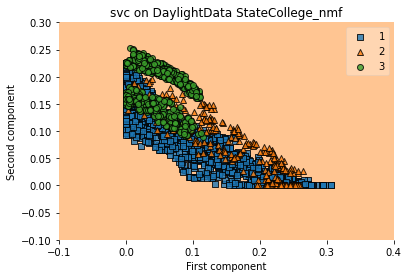

C
1
gamma
0.1


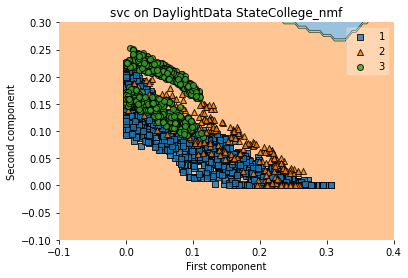

C
1
gamma
1


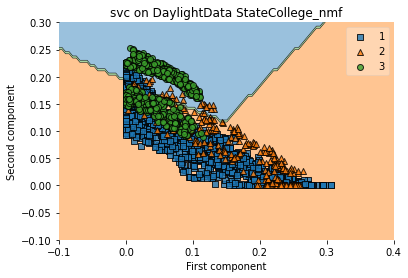

C
1
gamma
5


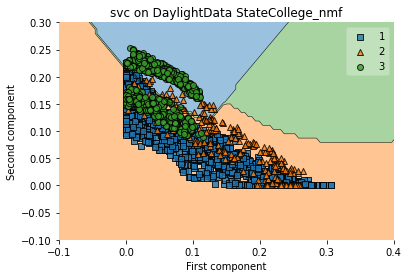

C
1
gamma
10


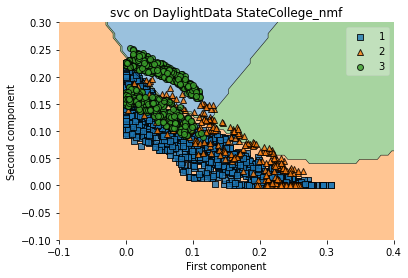

C
5
gamma
0.01


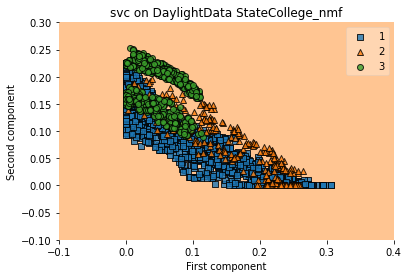

C
5
gamma
0.1


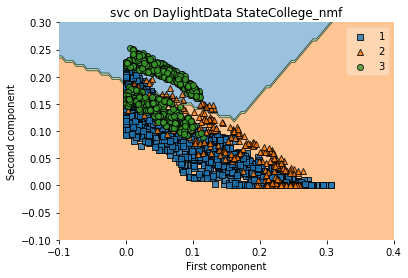

C
5
gamma
1


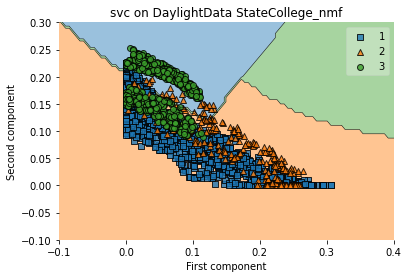

C
5
gamma
5


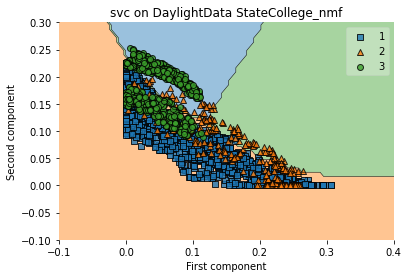

C
5
gamma
10


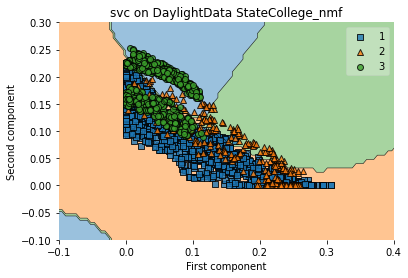

C
10
gamma
0.01


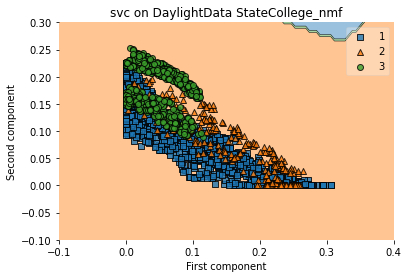

C
10
gamma
0.1


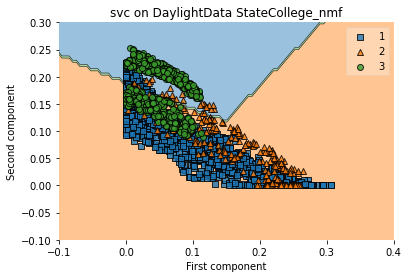

C
10
gamma
1


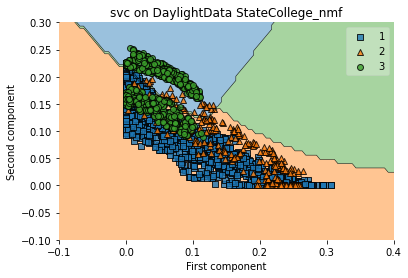

C
10
gamma
5


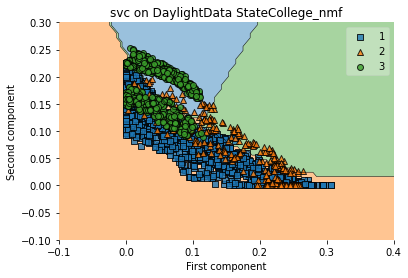

C
10
gamma
10


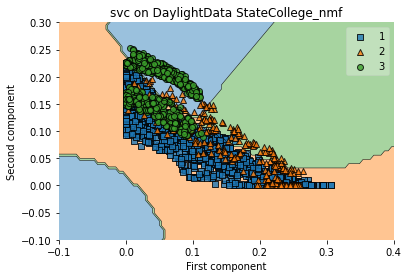

In [194]:
from sklearn.neural_network import MLPClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import NMF
import mglearn
from matplotlib import pyplot as plt

i=0
c = [0.01, 0.1, 1, 5, 10]
g = [0.01, 0.1, 1, 5, 10]
nmf = NMF(n_components=2, random_state=42,max_iter=500)
NMF_R = nmf.fit_transform(X_train_scaledM)
NMF_Rt = nmf.fit_transform(X_test_scaledM)

while i<=4:
    j=0
    while j<=4:
        
        svc = SVC(kernel='rbf', C= c[i], gamma=g[j])
        svm = svc.fit(NMF_R, y_train)

        print("C")
        print(c[i])
        print("gamma")
        print(g[j])
        

        value=0.25
        width=0.75
        
        plot_decision_regions(NMF_R, y_train.astype(np.integer), clf=svc, feature_index=[0,1])
        
        #Adding axes annotations
        plt.xlabel('First component')
        plt.ylabel('Second component')
        plt.title('svc on DaylightData StateCollege_nmf')
        plt.xlim(-0.1, 0.4)
        plt.ylim(-0.1, 0.3)
        plt.show()
        
      
        j=j+1
    i=i+1


C
0.01
gamma
0.01


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


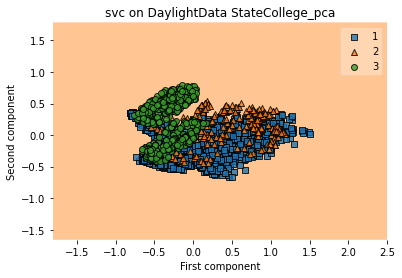

C
0.01
gamma
0.1


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


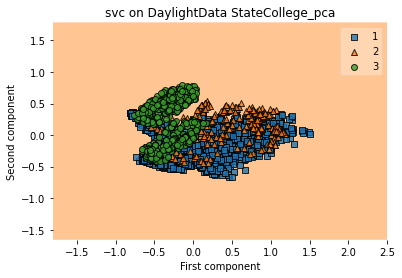

C
0.01
gamma
1


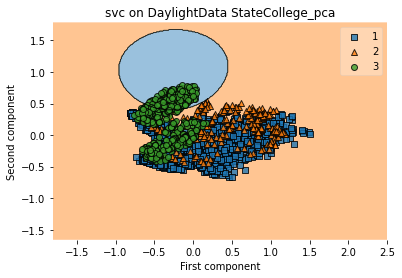

C
0.01
gamma
5


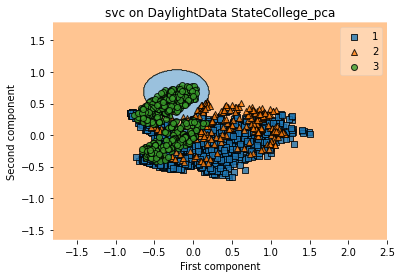

C
0.01
gamma
10


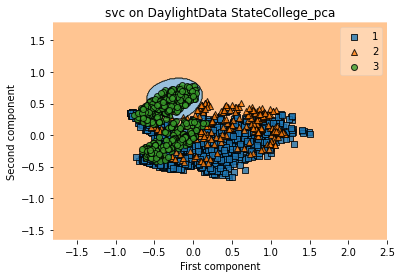

C
0.1
gamma
0.01


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


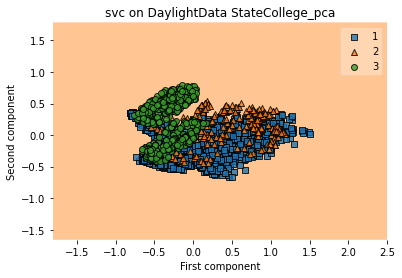

C
0.1
gamma
0.1


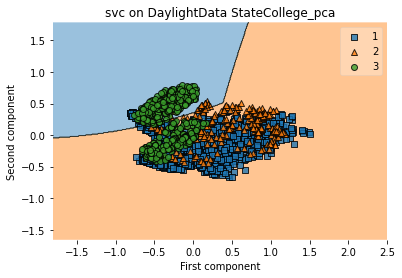

C
0.1
gamma
1


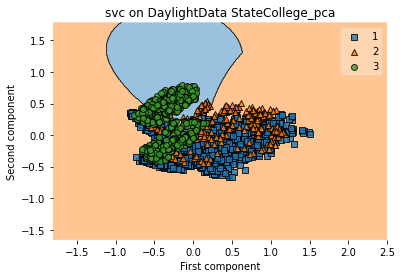

C
0.1
gamma
5


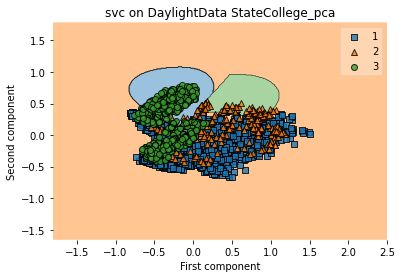

C
0.1
gamma
10


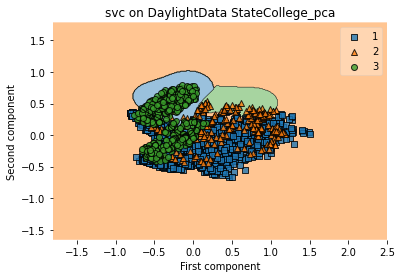

C
1
gamma
0.01


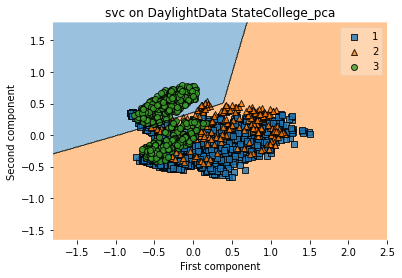

C
1
gamma
0.1


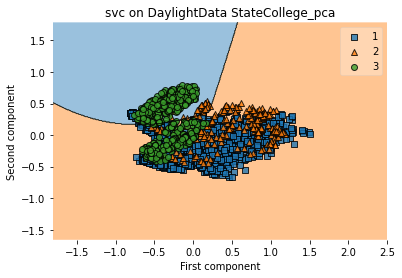

C
1
gamma
1


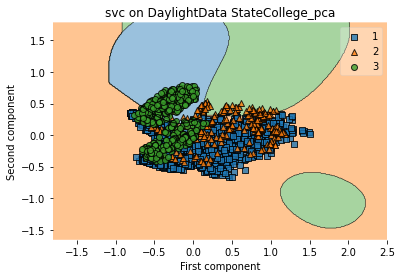

C
1
gamma
5


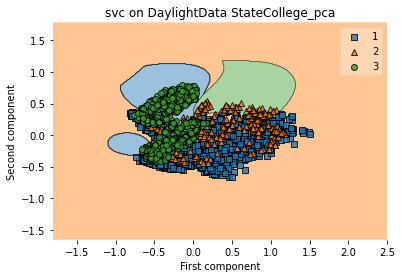

C
1
gamma
10


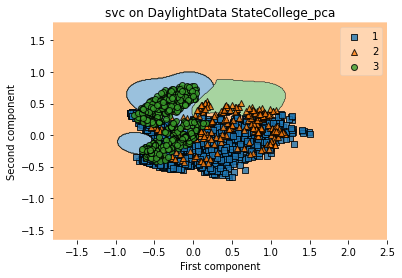

C
5
gamma
0.01


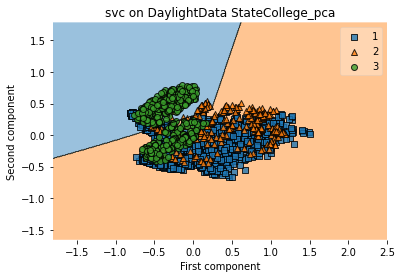

C
5
gamma
0.1


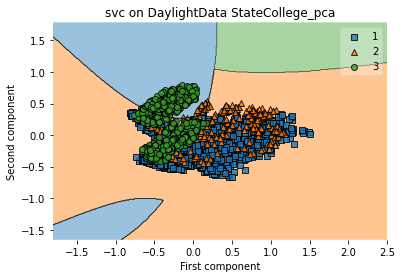

C
5
gamma
1


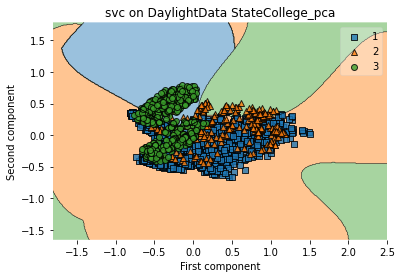

C
5
gamma
5


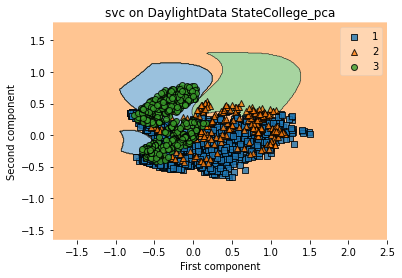

C
5
gamma
10


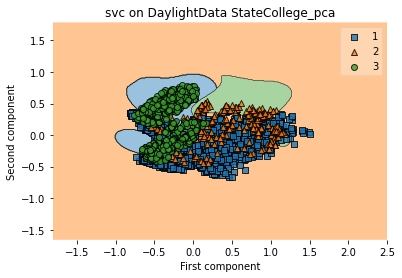

C
10
gamma
0.01


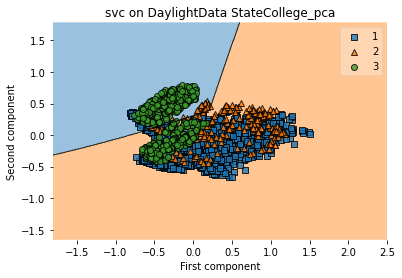

C
10
gamma
0.1


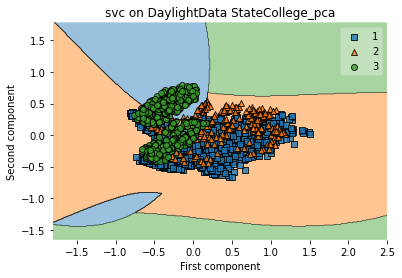

C
10
gamma
1


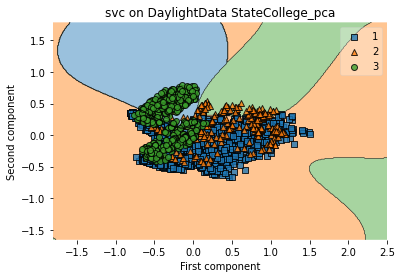

C
10
gamma
5


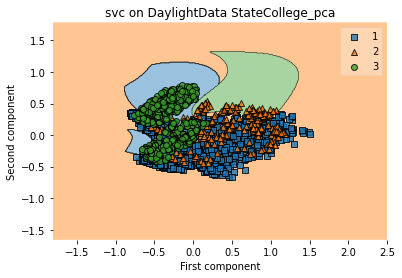

C
10
gamma
10


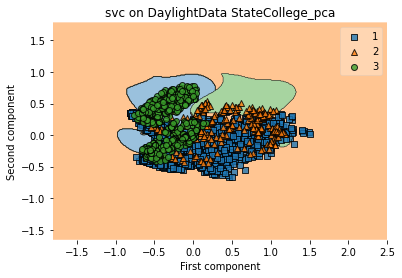

In [196]:
from sklearn.neural_network import MLPClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import NMF
import mglearn
from matplotlib import pyplot as plt

i=0
c = [0.01, 0.1, 1, 5, 10]
g = [0.01, 0.1, 1, 5, 10]
pca = PCA(n_components=2)
pca.fit_transform(X_train_scaledM)
X_new = pca.transform(X_train_scaledM)
X_newt = pca.transform(X_test_scaledM)


while i<=4:
    j=0
    while j<=4:
        
        svc = SVC(kernel='rbf', C= c[i], gamma=g[j])
        svm = svc.fit(X_new, y_train)

        print("C")
        print(c[i])
        print("gamma")
        print(g[j])
        

        value=0.25
        width=0.75
        
        plot_decision_regions(X_new, y_train.astype(np.integer), clf=svc, feature_index=[0,1])
        
        #Adding axes annotations
        plt.xlabel('First component')
        plt.ylabel('Second component')
        plt.title('svc on DaylightData StateCollege_pca')
        plt.show()
        
      
        j=j+1
    i=i+1


In [43]:
import mglearn

In [217]:
## Stratified K-Fold cross-validation on svc
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

svc = SVC(kernel='rbf', C= 10, gamma=5)
svm = svc.fit(X_train_scaledM, y_train)

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scoress = cross_val_score(svc, X_train_scaledM, y_train, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scoress))

Cross-validation scores:
[0.99675325 0.99512987 0.99918831 0.99594156 1.         0.99918831
 0.99837662 0.99756494 0.99837662 0.99837662]


# Regression

Pytorch regression example

# Linear regression

In [234]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

daylight_data1 = SC_D.drop(['Encoded_data'],axis=1)



In [235]:
daylight_data1.describe()

Direct_irradiance   Diffused_irradiance  Sd/Ed_ratio   3rd_sensor  \
count         3285.000000          3285.000000  3285.000000  3285.000000   
mean           330.626484           171.673668     2.323182   440.987823   
std            325.868138           100.802342     0.561542   399.005676   
min              0.000000             2.000000     0.800000     3.000000   
25%              0.000000            91.000000     1.930168   135.000000   
50%            219.000000           154.000000     2.348485   279.000000   
75%            644.000000           233.000000     2.662651   686.000000   
max           1003.000000           589.000000     3.755418  1915.000000   

       Final_2_sensor daylight signal  Final_2_sensor signal  Dimming_level  \
count                     3285.000000            3285.000000    3285.000000   
mean                       401.676712             464.017971      47.731720   
std                        344.650024             319.565616      30.937025   
min                          3.000000             105.187028       1.000000   
25%                        130.000000             216.584990      18.071226   
50%                        275.000000             339.027494      53.452414   
75%                        602.000000             642.185531      74.302043   
max                       1711.000000            1732.075771      96.415285   

            Shades  
count  3285.000000  
mean      1.613699  
std       0.859280  
min       1.000000  
25%       1.000000  
50%       1.000000  
75%       3.000000  
max       3.000000

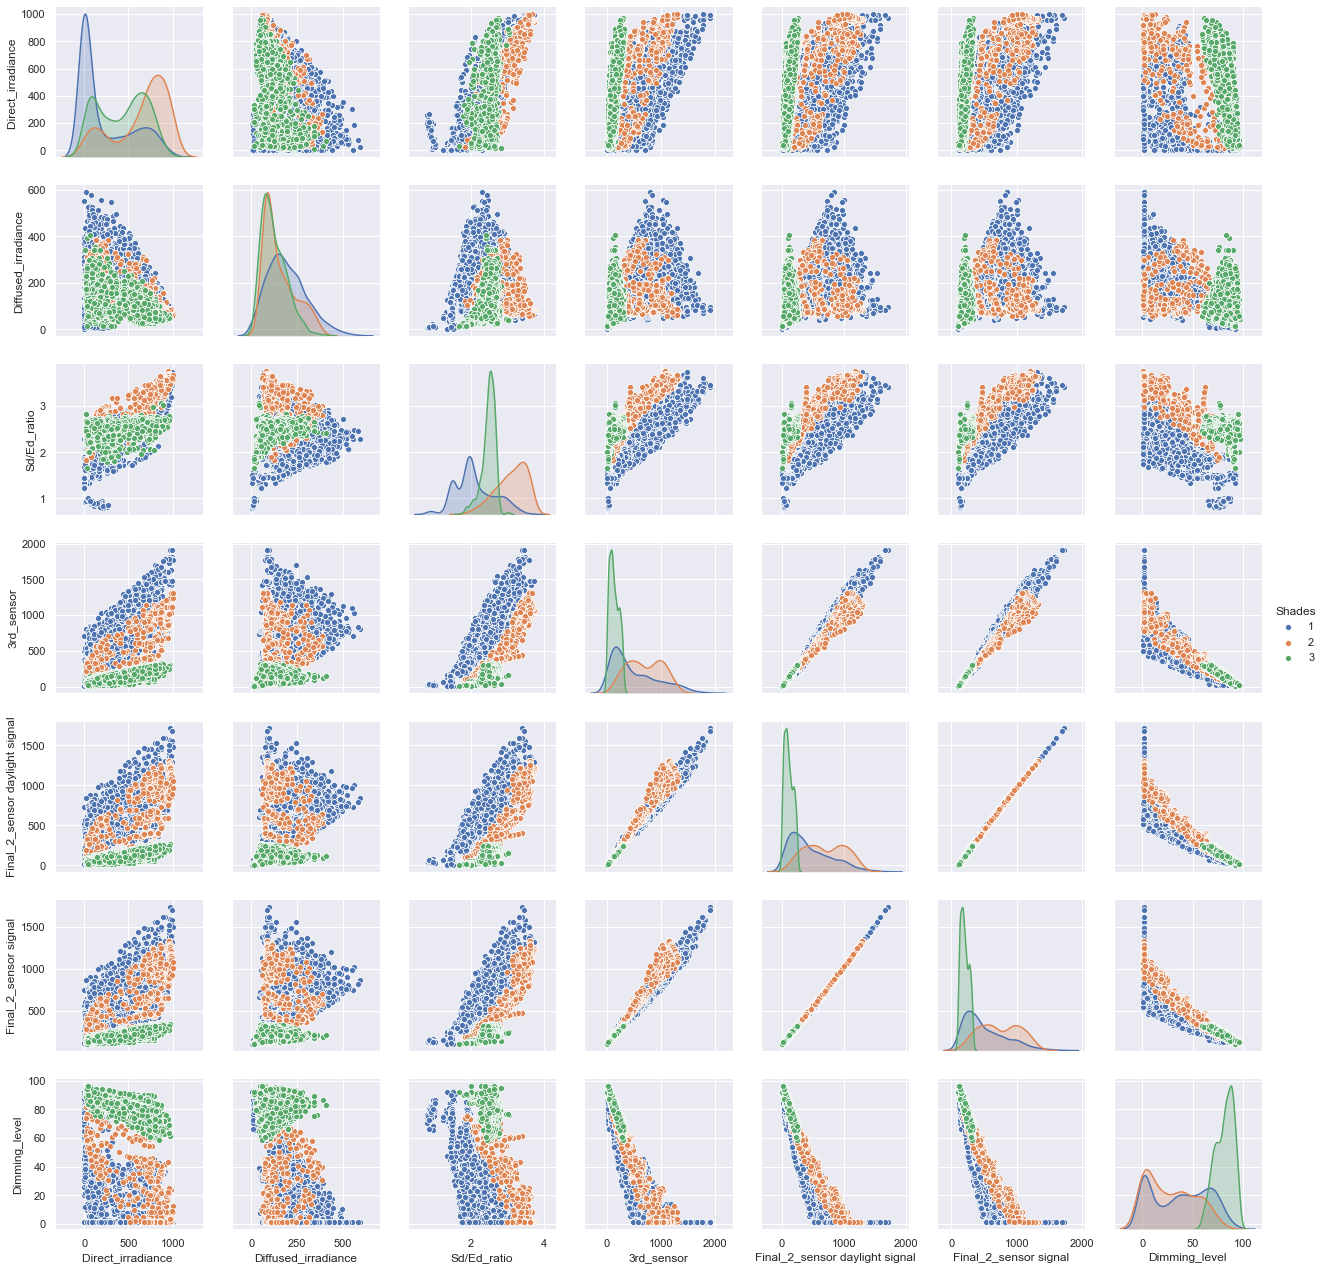

In [236]:
p=sns.pairplot(daylight_data1, hue = 'Shades')

In [237]:
X1 = SC_D['3rd_sensor']
y1 = SC_D['Sd/Ed_ratio']

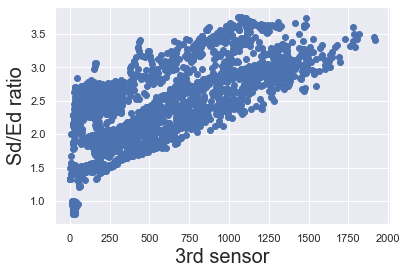

In [238]:
import statsmodels.api as sm
plt.scatter(X1,y1)
 
plt.xlabel('3rd sensor', fontsize = 20)
 
plt.ylabel('Sd/Ed ratio', fontsize = 20)
 
plt.show()

In [239]:
x = sm.add_constant(X1)
 
results = sm.OLS(y1,x).fit()
 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Sd/Ed_ratio   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     2461.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:54:07   Log-Likelihood:                -1846.2
No. Observations:                3285   AIC:                             3696.
Df Residuals:                    3283   BIC:                             3709.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9169      0.011    173.598      0.000       1.895       1.939
3rd_sensor     0.0009   1.86e-05     49.609      0.000       0.001       0.001
==============================================================================
Omnibus:                      574.235   Durbin-Watson:                   0.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.035
Skew:                           0.127   Prob(JB):                     2.13e-29
Kurtosis:                       2.051   Cond. No.                         886.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

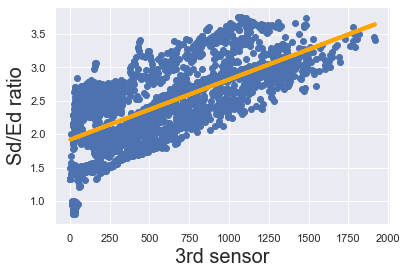

In [148]:
plt.scatter(X1,y1)
 
yhat = 0.0009*X1 + 1.9169
 
fig = plt.plot(X1,yhat, lw=4, c='orange', label = 'regression line')
 
plt.xlabel('3rd sensor', fontsize = 20)
 
plt.ylabel('Sd/Ed ratio', fontsize = 20)
 
plt.show()

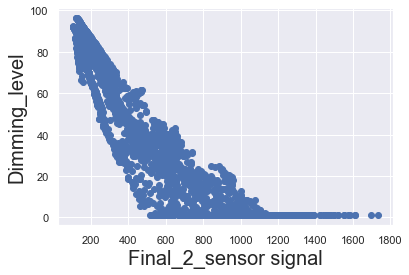

In [149]:
X2 = SC_D['Final_2_sensor signal']
y2 = SC_D['Dimming_level']

import statsmodels.api as sm
plt.scatter(X2,y2)
 
plt.xlabel('Final_2_sensor signal', fontsize = 20)
 
plt.ylabel('Dimming_level', fontsize = 20)
 
plt.show()

In [150]:
n = sm.add_constant(X2)
 
results = sm.OLS(y2,n).fit()
 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Dimming_level   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                 1.460e+04
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:22:28   Log-Likelihood:                -13151.
No. Observations:                3285   AIC:                         2.631e+04
Df Residuals:                    3283   BIC:                         2.632e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    88.3206      0.408    216.544      0.000      87.521      89.120
Final_2_sensor signal    -0.0875      0.001   -120.827      0.000      -0.089      -0.086
==============================================================================
Omnibus:                      115.688   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.331
Skew:                          -0.288   Prob(JB):                     7.03e-45
Kurtosis:                       4.074   Cond. No.                         993.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

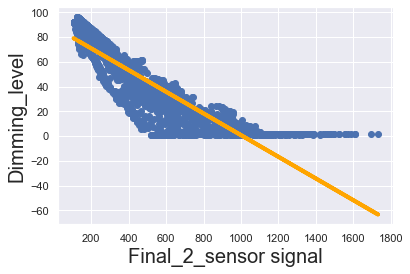

In [152]:
plt.scatter(X2,y2)
 
yhat = -0.0875*X2 + 88.3206
 
fig = plt.plot(X2,yhat, lw=4, c='orange', label = 'regression line')
 
plt.xlabel('Final_2_sensor signal', fontsize = 20)
 
plt.ylabel('Dimming_level', fontsize = 20)
 
plt.show()

# Unsupervised learning

# PCA

Original shape: (2463, 8)
Reduced shape: (2463, 2)


Text(0.5, 1.0, '2 components pca for StateCollege data set')

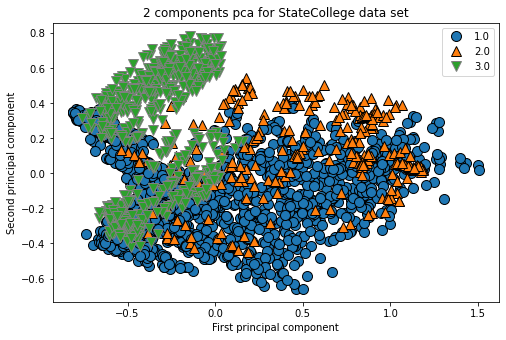

In [9]:
import mglearn
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

pca = PCA(n_components=2)
pca.fit_transform(X_train_scaledM)
X_new = pca.transform(X_train_scaledM)
X_newt = pca.transform(X_test_scaledM)

print("Original shape: {}".format(str(X_train_scaledM.shape)))
print("Reduced shape: {}".format(str(X_new.shape)))


plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_new[:, 0], X_new[:, 1], y_train)
plt.legend(loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title('2 components pca for StateCollege data set')


In [103]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.56685224, 0.19890648])

In [140]:
c = [2, 3, 4, 5, 6]
n = [1, 2, 3, 5, 7, 9]
i=0
while i<=4:
    j=0
    while j<=5:
        
        pca = PCA(n_components= c[i])
        pca.fit_transform(X_train_scaledM)
        X_new = pca.transform(X_train_scaledM)
        X_newt = pca.transform(X_test_scaledM)

        knn_pca = KNeighborsClassifier(n_neighbors=n[j])
        knn_pca.fit(X_new, y_train)
        
        print("n_components")
        print(c[i])
        print("n_neighbors")
        print(n[j])
        print("Train score after PCA",knn_pca.score(X_new,y_train),"%")
        print("Test score after PCA",knn_pca.score(X_newt,y_test),"%")
        print('\n')
        
        j=j+1
        
    i=i+1


n_components
2
n_neighbors
1
Train score after PCA 1.0 %
Test score after PCA 0.8309002433090025 %


n_components
2
n_neighbors
2
Train score after PCA 0.9053999187982136 %
Test score after PCA 0.8491484184914841 %


n_components
2
n_neighbors
3
Train score after PCA 0.904993909866017 %
Test score after PCA 0.8491484184914841 %


n_components
2
n_neighbors
5
Train score after PCA 0.881851400730816 %
Test score after PCA 0.8454987834549879 %


n_components
2
n_neighbors
7
Train score after PCA 0.8733252131546894 %
Test score after PCA 0.8467153284671532 %


n_components
2
n_neighbors
9
Train score after PCA 0.8672350791717418 %
Test score after PCA 0.8418491484184915 %


n_components
3
n_neighbors
1
Train score after PCA 1.0 %
Test score after PCA 0.9683698296836983 %


n_components
3
n_neighbors
2
Train score after PCA 0.9837596427121397 %
Test score after PCA 0.9671532846715328 %


n_components
3
n_neighbors
3
Train score after PCA 0.9870077141697118 %
Test score after PCA 0.972019464

Populating the interactive namespace from numpy and matplotlib


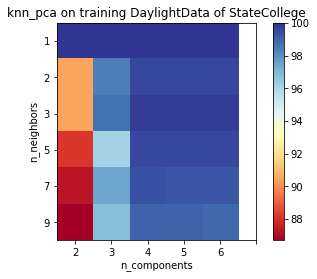

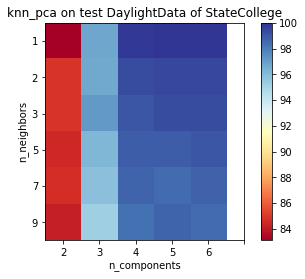

In [202]:
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

c = [2, 3, 4, 5, 6]
n = [1, 2, 3, 5, 7, 9]

# training set
df = pd.DataFrame([[100, 100, 100, 100, 100], [90.5, 98.4, 99.6, 99.6, 99.6], [90.5, 98.7, 99.8, 99.8, 99.8], [88.2, 96.2, 99.6, 99.6, 99.6], [87.3, 97.5, 99.4, 99.3, 99.3], [86.7, 96.8, 99, 99, 98.9]], 
                   columns = c, index = n) 
plt.imshow(df, cmap ="RdYlBu")
plt.colorbar()
plt.xticks(range(len(df)), df.columns)
plt.yticks(range(len(df)), df.index)
plt.xlabel('n_components')
plt.ylabel('n_neighbors')
plt.title('knn_pca on training DaylightData of StateCollege')
plt.show()

# test set
df1 = pd.DataFrame([[83.1, 96.8, 99.9, 100, 100], [84.9, 96.7, 99.4, 99.5, 99.5], [84.9, 97.2, 99.1, 99.4, 99.4], [84.5, 96.2, 98.9, 98.9, 99.1], [84.7, 95.9, 98.7, 98.5, 98.8], [84.2, 95.3, 98.4, 98.7, 98.5]], columns = c, index = n)   
plt.imshow(df1, cmap ="RdYlBu")
plt.colorbar()
plt.xticks(range(len(df1)), df1.columns)
plt.yticks(range(len(df1)), df1.index)
plt.xlabel('n_components')
plt.ylabel('n_neighbors')
plt.title('knn_pca on test DaylightData of StateCollege')
plt.show()

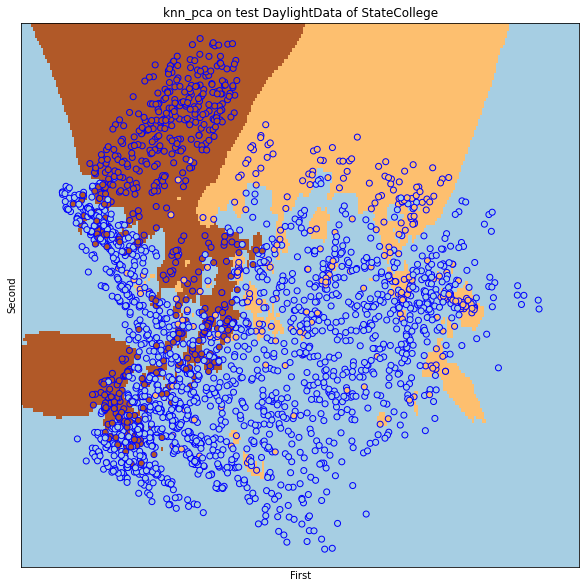

In [203]:
import numpy as np
import pylab as pl
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

h = .01 # step size in the mesh


pca = PCA(n_components=2)
pca.fit_transform(X_train_scaledM)
X_new = pca.transform(X_train_scaledM)
X_newt = pca.transform(X_test_scaledM)
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_new, y_train)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].

x_min, x_max = X_new[:,0].min() - 0.2, X_new[:,0].max() + 0.2
y_min, y_max = X_new[:,1].min() - 0.05, X_new[:,1].max() + 0.05

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(10, 10))
pl.set_cmap(pl.cm.Paired)
pl.pcolormesh(xx, yy, Z)

# Plot also the training points
pl.scatter(X_new[:,0], X_new[:,1],c=y_train,edgecolor='b' )
pl.xlabel('First')
pl.ylabel('Second')
plt.title('knn_pca on test DaylightData of StateCollege')

pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.xticks(())
pl.yticks(())

pl.show()

# NMF

In [10]:
%matplotlib inline
from sklearn.decomposition import NMF
import mglearn
from matplotlib import pyplot as plt
from sklearn.svm import SVC

# applying the NMF to the scaled x-train set with two componenets

nmf = NMF(n_components=2, random_state=42,max_iter=500)
NMF_R = nmf.fit_transform(X_train_scaledM)
NMF_Rt = nmf.fit_transform(X_test_scaledM)
                          
print("Recovered original Dalight shadings Type shape: {}".format(NMF_R.shape))
NMF_R

Recovered original Dalight shadings Type shape: (2463, 2)


array([[0.19102559, 0.0412969 ],
       [0.0296046 , 0.13358388],
       [0.02985462, 0.22821298],
       ...,
       [0.06522162, 0.08135893],
       [0.01047607, 0.24094772],
       [0.06105394, 0.20649862]])

Text(0.5, 1.0, '2 components nmf for StateCollege data set')

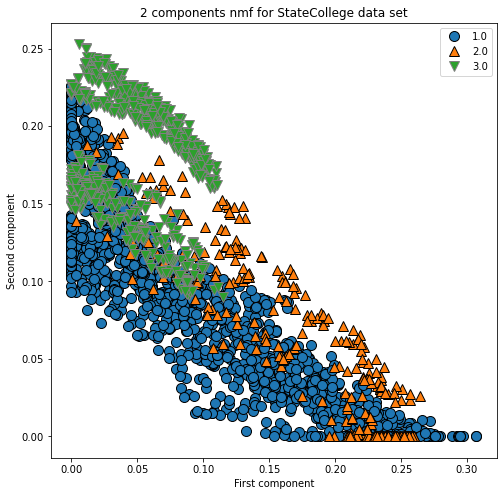

In [219]:
# plot results from NMF below

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(NMF_R[:,0], NMF_R[:,1], y_train)
plt.legend(loc="best")
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title('2 components nmf for StateCollege data set')


In [223]:

c = [2, 3, 4, 5, 6, 7]
n = [1, 2, 3, 5, 7, 9]
j=0
while j<=5:
    i=0
    while i<=5:
        nmf = NMF(n_components=c[i], random_state=42,max_iter=1600)
        NMF_R = nmf.fit_transform(X_train_scaledM)
        NMF_Rt = nmf.fit_transform(X_test_scaledM)

        knn_nmf = KNeighborsClassifier(n_neighbors=n[j])
        knn_nmf.fit(NMF_R, y_train)
        
        
        print("n_components")
        print(c[i])
        print("n_neighbors")
        print(n[j])
        print("Train score after NMF",knn_nmf.score(NMF_R,y_train),)
        print("Test score after NMF",knn_nmf.score(NMF_Rt,y_test),)
        print('\n')
        
        i=i+1
        
    j=j+1

n_components
2
n_neighbors
1
Train score after NMF 1.0
Test score after NMF 0.5109489051094891


n_components
3
n_neighbors
1
Train score after NMF 1.0
Test score after NMF 0.5121654501216545


n_components
4
n_neighbors
1
Train score after NMF 1.0
Test score after NMF 0.6204379562043796


n_components
5
n_neighbors
1
Train score after NMF 1.0
Test score after NMF 0.7141119221411192


n_components
6
n_neighbors
1
Train score after NMF 1.0
Test score after NMF 0.7554744525547445




C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 1600 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 1600 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


n_components
7
n_neighbors
1
Train score after NMF 1.0
Test score after NMF 0.7773722627737226


n_components
2
n_neighbors
2
Train score after NMF 0.9220462850182704
Test score after NMF 0.5462287104622872


n_components
3
n_neighbors
2
Train score after NMF 0.9930978481526593
Test score after NMF 0.5109489051094891


n_components
4
n_neighbors
2
Train score after NMF 0.9902557856272838
Test score after NMF 0.6545012165450121


n_components
5
n_neighbors
2
Train score after NMF 0.9955339017458384
Test score after NMF 0.7566909975669099


n_components
6
n_neighbors
2
Train score after NMF 0.998375964271214
Test score after NMF 0.7773722627737226




C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 1600 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 1600 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


n_components
7
n_neighbors
2
Train score after NMF 0.9967519285424279
Test score after NMF 0.7871046228710462


n_components
2
n_neighbors
3
Train score after NMF 0.9208282582216809
Test score after NMF 0.5206812652068127


n_components
3
n_neighbors
3
Train score after NMF 0.9930978481526593
Test score after NMF 0.5121654501216545


n_components
4
n_neighbors
3
Train score after NMF 0.9918798213560698
Test score after NMF 0.6411192214111923


n_components
5
n_neighbors
3
Train score after NMF 0.9971579374746244
Test score after NMF 0.7360097323600974


n_components
6
n_neighbors
3
Train score after NMF 0.9979699553390174
Test score after NMF 0.7822384428223844




C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 1600 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 1600 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


n_components
7
n_neighbors
3
Train score after NMF 0.9967519285424279
Test score after NMF 0.7822384428223844


n_components
2
n_neighbors
5
Train score after NMF 0.90580592773041
Test score after NMF 0.5218978102189781


n_components
3
n_neighbors
5
Train score after NMF 0.9870077141697118
Test score after NMF 0.5097323600973236


n_components
4
n_neighbors
5
Train score after NMF 0.9886317498984978
Test score after NMF 0.6496350364963503


n_components
5
n_neighbors
5
Train score after NMF 0.9947218838814454
Test score after NMF 0.754257907542579


n_components
6
n_neighbors
5
Train score after NMF 0.9939098660170523
Test score after NMF 0.7871046228710462




C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 1600 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 1600 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


n_components
7
n_neighbors
5
Train score after NMF 0.9930978481526593
Test score after NMF 0.7956204379562044


n_components
2
n_neighbors
7
Train score after NMF 0.8940316686967114
Test score after NMF 0.5413625304136253


n_components
3
n_neighbors
7
Train score after NMF 0.9845716605765327
Test score after NMF 0.5060827250608273


n_components
4
n_neighbors
7
Train score after NMF 0.9849776695087292
Test score after NMF 0.6618004866180048


n_components
5
n_neighbors
7
Train score after NMF 0.9914738124238733
Test score after NMF 0.7761557177615572


n_components
6
n_neighbors
7
Train score after NMF 0.9930978481526593
Test score after NMF 0.7956204379562044




C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 1600 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 1600 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


n_components
7
n_neighbors
7
Train score after NMF 0.9894437677628908
Test score after NMF 0.7992700729927007


n_components
2
n_neighbors
9
Train score after NMF 0.8859114900527811
Test score after NMF 0.5401459854014599


n_components
3
n_neighbors
9
Train score after NMF 0.9825416159155501
Test score after NMF 0.5085158150851582


n_components
4
n_neighbors
9
Train score after NMF 0.977669508729192
Test score after NMF 0.6654501216545012


n_components
5
n_neighbors
9
Train score after NMF 0.9882257409663012
Test score after NMF 0.7956204379562044


n_components
6
n_neighbors
9
Train score after NMF 0.9898497766950873
Test score after NMF 0.8102189781021898




C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 1600 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 1600 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


n_components
7
n_neighbors
9
Train score after NMF 0.9853836784409257
Test score after NMF 0.8090024330900243




Populating the interactive namespace from numpy and matplotlib


C:\Users\Abdulrahman Eid\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


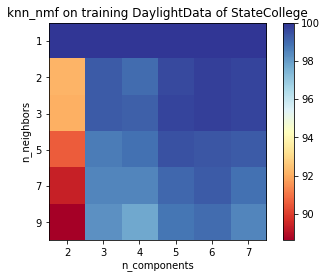

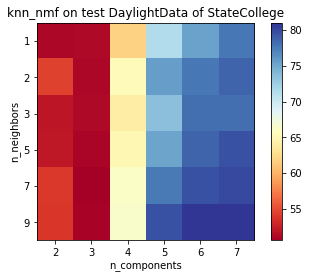

In [224]:
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

c = [2, 3, 4, 5, 6, 7]
n = [1, 2, 3, 5, 7, 9]

# training set
df = pd.DataFrame([[100, 100, 100, 100, 100, 100], [92.2, 99.3, 99, 99.6, 99.8, 99.7], 
                   [92.1, 99.3, 99.2, 99.7, 99.8, 99.7], [90.6, 98.7, 98.9, 99.5, 99.4, 99.3], 
                   [89.4, 98.5, 98.5, 99.1, 99.3, 98.9], [88.6, 98.3, 97.8, 98.8, 99, 98.5]], 
                   columns = c, index = n) 
plt.imshow(df, cmap ="RdYlBu")
plt.colorbar()
plt.xticks(range(len(df)), df.columns)
plt.yticks(range(len(df)), df.index)
plt.xlabel('n_components')
plt.ylabel('n_neighbors')
plt.title('knn_nmf on training DaylightData of StateCollege')
plt.show()

# test set
df1 = pd.DataFrame([[51.1, 51.2, 62, 71.4, 75.5, 77.7], [54.6, 51.1, 65.5, 75.7, 77.7, 78.7], 
                   [52.1, 51.2, 64.1, 73.6, 78.2, 78.2], [52.2, 51, 65, 75.4, 78.7, 79.6], 
                   [54.1, 50.6, 66.2, 77.6, 79.6, 80], [54, 50.9, 66.5, 79.6, 81, 80.9]], columns = c, index = n)   
plt.imshow(df1, cmap ="RdYlBu")
plt.colorbar()
plt.xticks(range(len(df1)), df1.columns)
plt.yticks(range(len(df1)), df1.index)
plt.xlabel('n_components')
plt.ylabel('n_neighbors')
plt.title('knn_nmf on test DaylightData of StateCollege')
plt.show()

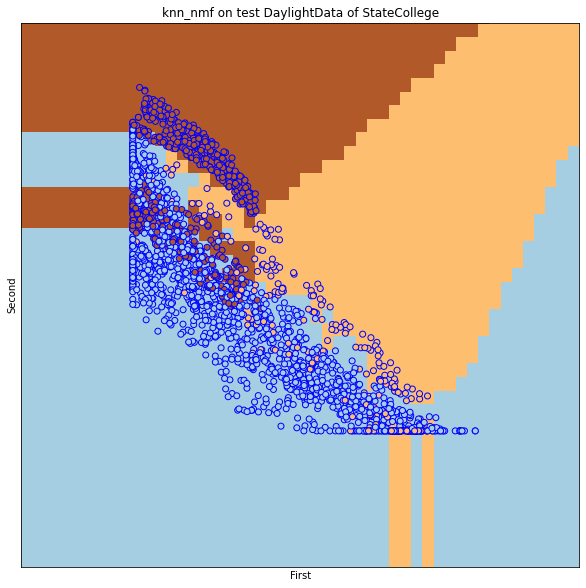

In [206]:
h = .01 # step size in the mesh

nmf = NMF(n_components=2, random_state=42,max_iter=500)
NMF_R = nmf.fit_transform(X_train_scaledM)
NMF_Rt = nmf.fit_transform(X_test_scaledM)

knn_nmf = KNeighborsClassifier(n_neighbors=3)
knn_nmf.fit(NMF_R, y_train)
        

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].

x_min, x_max = NMF_R[:,0].min() - 1, NMF_R[:,0].max() + 1.5
y_min, y_max = NMF_R[:,1].min() - 0.9, NMF_R[:,1].max() + 0.7

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn_nmf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(10, 10))
pl.set_cmap(pl.cm.Paired)
pl.pcolormesh(xx, yy, Z)

# Plot also the training points
pl.scatter(NMF_R[:,0], NMF_R[:,1],c=y_train,edgecolor='b' )
pl.xlabel('First')
pl.ylabel('Second')
plt.title('knn_nmf on test DaylightData of StateCollege')

pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.xticks(())
pl.yticks(())
plt.xlim(-0.1, 0.4)
plt.ylim(-0.1, 0.3)

pl.show()

# Agglomerative Clustering

In [15]:
from sklearn.cluster import AgglomerativeClustering

# Applying the agglomerative clustering model to scaled x train data set having the 2 nmf components

agg = AgglomerativeClustering(n_clusters=3)
Agg = agg.fit_predict(NMF_R)

Text(0, 0.5, 'Feature 1')

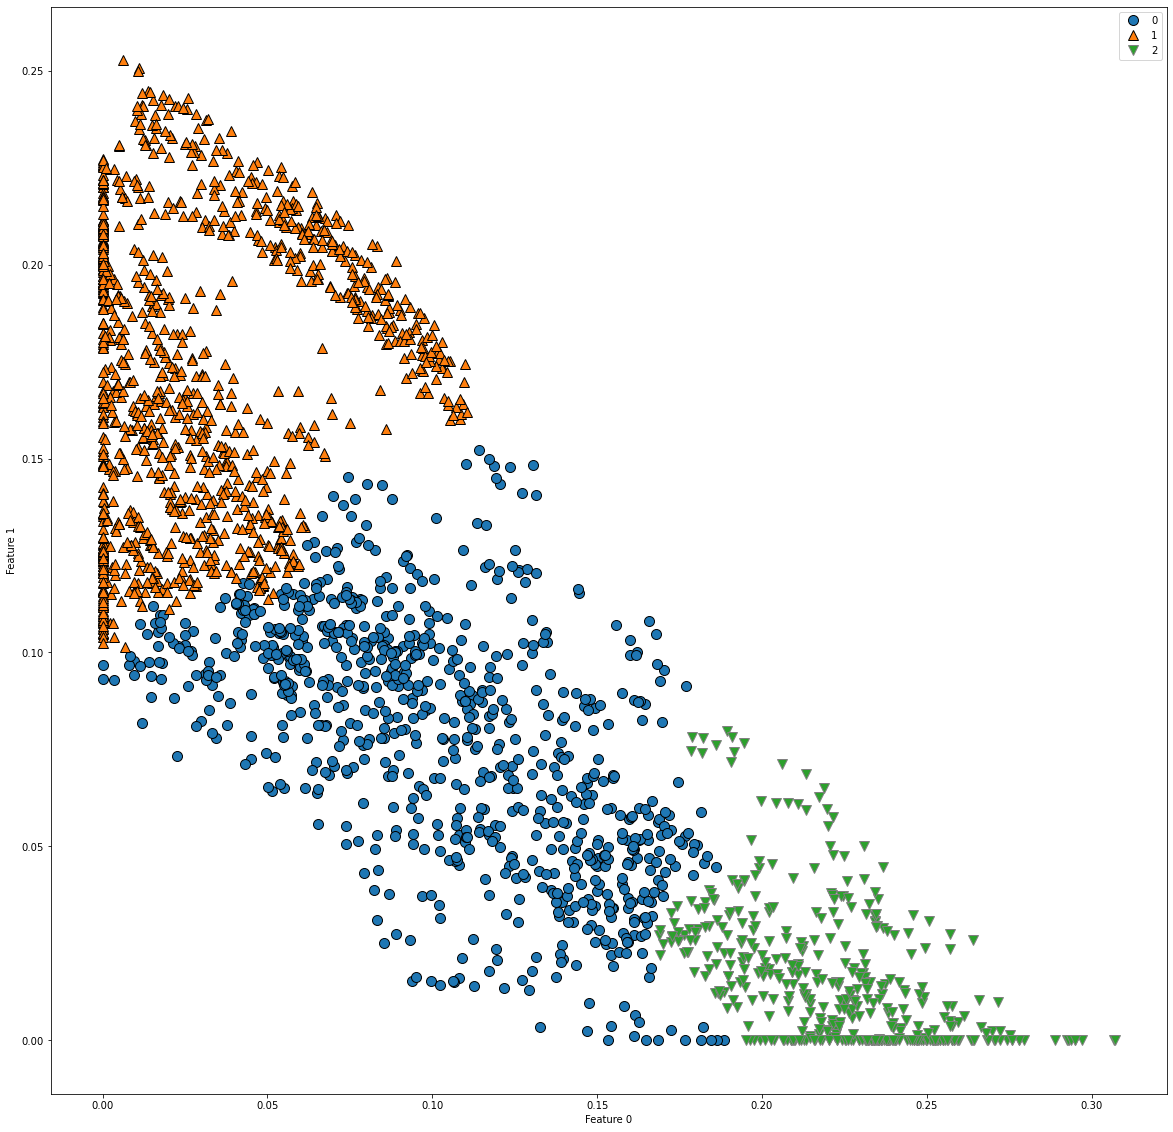

In [16]:
# plotting results from agglomerative clustring below

plt.figure(figsize=(20, 20))
mglearn.discrete_scatter(NMF_R[:, 0], NMF_R[:, 1], Agg)
plt.legend(loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

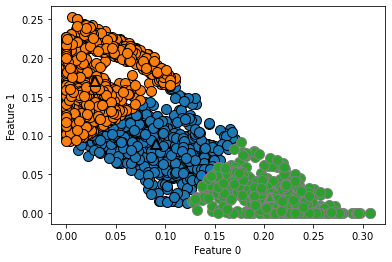

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(NMF_R)
y_pred = kmeans.predict(NMF_R)

# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(NMF_R[:, 0], NMF_R[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# DBSCAN

Cluster memberships:
[0 0 0 ... 0 0 0]


Text(0, 0.5, 'Feature 1')

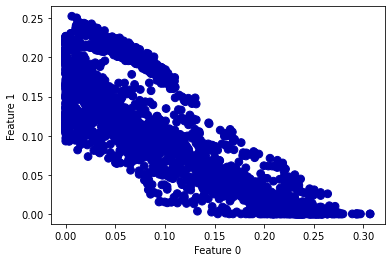

In [18]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()

clusters = dbscan.fit_predict(NMF_R)
print("Cluster memberships:\n{}".format(clusters))

# plot the cluster assignments
plt.scatter(NMF_R[:, 0], NMF_R[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")



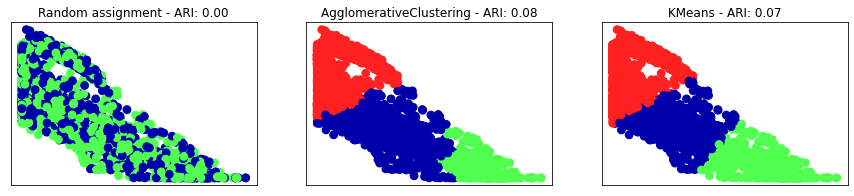

In [21]:
#### for evaluation

from sklearn.metrics.cluster import adjusted_rand_score
import numpy as np

# Applying the ARI metric to evaluate kmeans and agglomerative algorithms
# A list of algorithms to use

algorithms = [AgglomerativeClustering(n_clusters=3), KMeans(n_clusters=3), DBSCAN()]

# creating a random reference cluster assignment 

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(NMF_R))

# plotting random assignment

fig, axes = plt.subplots(1, 3, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

axes[0].scatter(NMF_R[:, 0], NMF_R[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train, random_clusters)))

# A for loop to generate the evaluated algorithms

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(NMF_R)
    ax.scatter(NMF_R[:, 0], NMF_R[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train, clusters)))

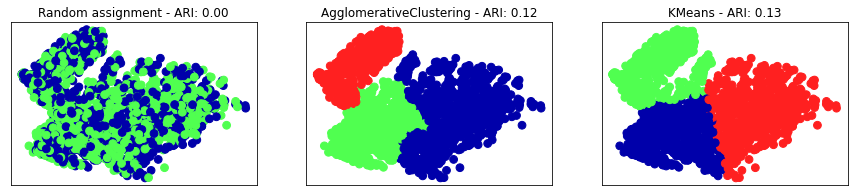

In [22]:
#### for evaluation

from sklearn.metrics.cluster import adjusted_rand_score
import numpy as np

# Applying the ARI metric to evaluate kmeans and agglomerative algorithms
# A list of algorithms to use

algorithms = [AgglomerativeClustering(n_clusters=3), KMeans(n_clusters=3),DBSCAN() ]

# creating a random reference cluster assignment 

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_new))

# plotting random assignment

fig, axes = plt.subplots(1, 3, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

axes[0].scatter(X_new[:, 0], X_new[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train, random_clusters)))

# A for loop to generate the evaluated algorithms

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_new)
    ax.scatter(X_new[:, 0], X_new[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train, clusters)))